# Project 1 - Team 7


  
---

In [136]:
# Dependencies and setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import pearsonr

# Import API key
# from Key1 import api_key

# Pollution data files
pollution_data_usa_path = "Resources/Data USA.csv"
pollution_data_canada_path= "Resources/Data Canada.csv"
pollution_data_chile_path="Resources/Data Chile.csv"
pollution_data_colombia_path="Resources/Data Colombia.csv"
pollution_data_mexico_path="Resources/Data Mexico.csv"
latitudes_longitudes_path="Resources/Cities (Latitude-Longitude).csv"
population_data_path = "Resources/population_by_cities.csv"
northern_hemisphere_data_path = "Resources/Northern_Hemisphere_data.csv"
southern_hemisphere_data_path = "Resources\Southern_Hemisphere_data.csv"

# Read the pollution data
usa_pollution_data= pd.read_csv(pollution_data_usa_path)
canada_pollution_data= pd.read_csv(pollution_data_canada_path)
chile_pollution_data= pd.read_csv(pollution_data_chile_path)
colombia_pollution_data= pd.read_csv(pollution_data_colombia_path)
mexico_pollution_data= pd.read_csv(pollution_data_mexico_path)
file_latitude_longitude= pd.read_csv(latitudes_longitudes_path,encoding='ISO-8859-1')
population_data = pd.read_csv(population_data_path)
northern_hemisphere_data = pd.read_csv(northern_hemisphere_data_path)
southern_hemisphere_data = pd.read_csv(southern_hemisphere_data_path)

In [2]:
#Concatenating all the datasets
total_pollution_data=pd.concat([usa_pollution_data, canada_pollution_data,chile_pollution_data,colombia_pollution_data,mexico_pollution_data])

In [3]:
#Show the total pollution data
total_pollution_data

,Country,Cities,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,New York,13.8,13.0,12.6,12.8,11.8,12.4,11.6,12.1,...,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,United States,Los Angeles,18.1,16.0,16.4,15.4,14.8,15.8,14.3,15.5,...,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,United States,Chicago,15.1,15.3,14.2,13.6,12.5,13.8,12.9,13.2,...,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,United States,Washington,14.0,13.1,13.4,14.0,12.8,13.4,12.4,12.4,...,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
4,United States,San Francisco,11.0,10.5,12.3,11.1,11.1,11.3,11.2,11.0,...,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Mexico,Teziutlan,30.7,25.4,24.9,25.3,23.3,23.5,24.1,23.6,...,21.9,20.5,20.8,20.0,19.8,18.4,18.2,16.4,15.1,15.4
88,Mexico,Apatzingan,25.4,22.0,22.6,22.3,20.7,21.3,21.6,21.4,...,19.8,18.2,18.8,17.4,17.3,17.2,16.9,15.3,13.4,13.1
89,Mexico,Zapotlan el Grande,23.5,20.6,21.0,20.6,19.1,20.1,20.1,19.6,...,18.8,16.7,17.3,16.4,16.5,16.6,15.9,14.2,12.6,12.5
90,Mexico,Hidalgo del Parral,21.1,20.1,21.2,19.6,17.7,17.8,19.2,18.6,...,19.0,16.6,16.7,16.0,15.7,15.4,14.4,13.1,11.3,12.5


In [37]:
#Reducing dataset (Only data 2010 until 2020)
total_pollution_data_2010_to_2020 = total_pollution_data.loc[:, ["Country", "Cities", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
total_pollution_data_2010_to_2020

 

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6
4,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Mexico,Teziutlan,20.0,21.9,20.5,20.8,20.0,19.8,18.4,18.2,16.4,15.1,15.4
88,Mexico,Apatzingan,17.6,19.8,18.2,18.8,17.4,17.3,17.2,16.9,15.3,13.4,13.1
89,Mexico,Zapotlan el Grande,16.3,18.8,16.7,17.3,16.4,16.5,16.6,15.9,14.2,12.6,12.5
90,Mexico,Hidalgo del Parral,15.8,19.0,16.6,16.7,16.0,15.7,15.4,14.4,13.1,11.3,12.5


In [38]:
#Merging with the file with latitude and longitude of every city

Merged_df=pd.merge(total_pollution_data_2010_to_2020,file_latitude_longitude,left_on=['Cities','Country'], right_on=['city','country'],how='inner')
Merged_df=Merged_df[["Country", "Cities", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020","lat","lng"]]

#Removing duplicates (Some cities have multiple latitudes and longitudes since they are big cities)

merged_df_no_duplicates = Merged_df.drop_duplicates(subset=["Country", "Cities"])

            

In [39]:
#Export the City_Data into a csv
merged_df_no_duplicates.to_csv("Resources/total pollution data 2010 to 2020.csv",index=False)

In [40]:
#Show the full merged dataframe
merged_df_no_duplicates

,Country,Cities,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,lat,lng
0,United States,New York,9.5,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0,40.6943,-73.9249
1,United States,Los Angeles,11.7,12.1,11.8,11.2,11.2,10.2,9.4,10.4,10.3,9.3,10.9,34.1141,-118.4068
2,United States,Chicago,11.2,11.4,10.7,10.4,10.6,10.0,9.4,9.3,9.4,9.2,9.7,41.8375,-87.6866
3,United States,Washington,10.2,10.2,9.8,9.0,8.7,8.5,8.0,7.7,7.9,7.5,7.6,38.9047,-77.0163
14,United States,San Francisco,8.9,8.9,8.6,8.8,8.2,8.2,6.8,9.1,10.1,7.2,9.5,37.7558,-122.4449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Mexico,Delicias,16.6,19.5,17.2,17.4,16.7,16.6,15.8,15.6,14.3,12.2,13.0,28.1931,-105.4717
315,Mexico,Tuxpan,19.1,21.5,19.2,19.9,19.0,19.1,18.6,17.6,16.1,14.6,14.8,19.5539,-103.3756
318,Mexico,Iguala de la Independencia,17.8,19.8,18.0,19.3,17.3,17.2,17.6,16.6,15.4,13.8,13.4,18.3450,-99.5383
319,Mexico,Uriangato,19.1,21.6,19.5,20.2,19.2,18.8,19.0,18.1,16.4,14.2,14.2,20.1333,-101.1667


In [41]:
# Dividing dataframe into northern and southern hemisphere for later calculating the temperatures of the seasons
# The dataframe is being divided since the northen and southern hemisphere have seasons on different times of the year

Northern_hemisphere=merged_df_no_duplicates[(merged_df_no_duplicates['Country'] == "United States") | (merged_df_no_duplicates['Country'] == "Canada")|(merged_df_no_duplicates['Country']=="Mexico")]
Southern_hemisphere=merged_df_no_duplicates[(merged_df_no_duplicates['Country'] == "Chile") | (merged_df_no_duplicates['Country'] == "Colombia")]

In [73]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2010
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2010-03-19","2010-06-20","2010-09-21","2010-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2010=[]
temp_summer_2010=[]
temp_autumn_2010=[]
temp_winter_2010=[]
average_humidity_spring_2010=[]
average_humidity_summer_2010=[]
average_humidity_autumn_2010=[]
average_humidity_winter_2010=[]
average_wind_speed_spring_2010=[]
average_wind_speed_summer_2010=[]
average_wind_speed_autumn_2010=[]
average_wind_speed_winter_2010=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": city_max_temp})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": average_relative_humidity})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": average_wind_speed})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": city_max_temp})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": average_relative_humidity})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": average_wind_speed})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": city_max_temp})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": average_relative_humidity})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": average_wind_speed})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": city_max_temp})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": average_relative_humidity})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": None})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": None})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": None})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": None})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": None})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": None})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": None})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": None})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": None})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": None})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": None})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [75]:
#Converting all lists to dataframes
#Max temperatures 2010
df_temp_spring_2010 = pd.DataFrame.from_records(temp_spring_2010)
df_temp_summer_2010 = pd.DataFrame.from_records(temp_summer_2010)
df_temp_autumn_2010 = pd.DataFrame.from_records(temp_autumn_2010)
df_temp_winter_2010 = pd.DataFrame.from_records(temp_winter_2010)


#Average Humidity 2010
df_average_humidity_spring_2010 = pd.DataFrame.from_records(average_humidity_spring_2010)
df_average_humidity_summer_2010 = pd.DataFrame.from_records(average_humidity_summer_2010)
df_average_humidity_autumn_2010 = pd.DataFrame.from_records(average_humidity_autumn_2010)
df_average_humidity_winter_2010 = pd.DataFrame.from_records(average_humidity_winter_2010)


#Average Wind Speed 2010
df_average_wind_speed_spring_2010 = pd.DataFrame.from_records(average_wind_speed_spring_2010)
df_average_wind_speed_summer_2010 = pd.DataFrame.from_records(average_wind_speed_summer_2010)
df_average_wind_speed_autumn_2010 = pd.DataFrame.from_records(average_wind_speed_autumn_2010)
df_average_wind_speed_winter_2010 = pd.DataFrame.from_records(average_wind_speed_winter_2010)



In [77]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2011
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2011-03-19","2011-06-20","2011-09-21","2011-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2011=[]
temp_summer_2011=[]
temp_autumn_2011=[]
temp_winter_2011=[]
average_humidity_spring_2011=[]
average_humidity_summer_2011=[]
average_humidity_autumn_2011=[]
average_humidity_winter_2011=[]
average_wind_speed_spring_2011=[]
average_wind_speed_summer_2011=[]
average_wind_speed_autumn_2011=[]
average_wind_speed_winter_2011=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": city_max_temp})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": average_relative_humidity})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": average_wind_speed})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": city_max_temp})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": average_relative_humidity})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": average_wind_speed})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": city_max_temp})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": average_relative_humidity})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": average_wind_speed})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": city_max_temp})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": average_relative_humidity})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": None})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": None})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": None})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": None})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": None})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": None})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": None})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": None})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": None})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": None})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": None})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [78]:
#Converting all lists to dataframes
#Max temperatures 2011
df_temp_spring_2011 = pd.DataFrame.from_records(temp_spring_2011)
df_temp_summer_2011 = pd.DataFrame.from_records(temp_summer_2011)
df_temp_autumn_2011 = pd.DataFrame.from_records(temp_autumn_2011)
df_temp_winter_2011 = pd.DataFrame.from_records(temp_winter_2011)


#Average Humidity 2011
df_average_humidity_spring_2011 = pd.DataFrame.from_records(average_humidity_spring_2011)
df_average_humidity_summer_2011 = pd.DataFrame.from_records(average_humidity_summer_2011)
df_average_humidity_autumn_2011 = pd.DataFrame.from_records(average_humidity_autumn_2011)
df_average_humidity_winter_2011 = pd.DataFrame.from_records(average_humidity_winter_2011)


#Average Wind Speed 2011
df_average_wind_speed_spring_2011 = pd.DataFrame.from_records(average_wind_speed_spring_2011)
df_average_wind_speed_summer_2011 = pd.DataFrame.from_records(average_wind_speed_summer_2011)
df_average_wind_speed_autumn_2011 = pd.DataFrame.from_records(average_wind_speed_autumn_2011)
df_average_wind_speed_winter_2011 = pd.DataFrame.from_records(average_wind_speed_winter_2011)




In [83]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2012
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2012-03-19","2012-06-20","2012-09-21","2012-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2012=[]
temp_summer_2012=[]
temp_autumn_2012=[]
temp_winter_2012=[]
average_humidity_spring_2012=[]
average_humidity_summer_2012=[]
average_humidity_autumn_2012=[]
average_humidity_winter_2012=[]
average_wind_speed_spring_2012=[]
average_wind_speed_summer_2012=[]
average_wind_speed_autumn_2012=[]
average_wind_speed_winter_2012=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": city_max_temp})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": average_relative_humidity})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": average_wind_speed})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": city_max_temp})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": average_relative_humidity})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": average_wind_speed})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": city_max_temp})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": average_relative_humidity})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": average_wind_speed})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": city_max_temp})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": average_relative_humidity})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": None})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": None})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": None})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": None})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": None})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": None})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": None})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": None})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": None})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": None})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": None})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [88]:
#Converting all lists to dataframes
#Max temperatures 2012
df_temp_spring_2012 = pd.DataFrame.from_records(temp_spring_2012)
df_temp_summer_2012 = pd.DataFrame.from_records(temp_summer_2012)
df_temp_autumn_2012 = pd.DataFrame.from_records(temp_autumn_2012)
df_temp_winter_2012 = pd.DataFrame.from_records(temp_winter_2012)


#Average Humidity 2012
df_average_humidity_spring_2012 = pd.DataFrame.from_records(average_humidity_spring_2012)
df_average_humidity_summer_2012 = pd.DataFrame.from_records(average_humidity_summer_2012)
df_average_humidity_autumn_2012 = pd.DataFrame.from_records(average_humidity_autumn_2012)
df_average_humidity_winter_2012 = pd.DataFrame.from_records(average_humidity_winter_2012)


#Average Wind Speed 2012
df_average_wind_speed_spring_2012 = pd.DataFrame.from_records(average_wind_speed_spring_2012)
df_average_wind_speed_summer_2012 = pd.DataFrame.from_records(average_wind_speed_summer_2012)
df_average_wind_speed_autumn_2012 = pd.DataFrame.from_records(average_wind_speed_autumn_2012)
df_average_wind_speed_winter_2012 = pd.DataFrame.from_records(average_wind_speed_winter_2012)

In [89]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2013
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2013-03-19","2013-06-20","2013-09-21","2013-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2013=[]
temp_summer_2013=[]
temp_autumn_2013=[]
temp_winter_2013=[]
average_humidity_spring_2013=[]
average_humidity_summer_2013=[]
average_humidity_autumn_2013=[]
average_humidity_winter_2013=[]
average_wind_speed_spring_2013=[]
average_wind_speed_summer_2013=[]
average_wind_speed_autumn_2013=[]
average_wind_speed_winter_2013=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": city_max_temp})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": average_relative_humidity})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": average_wind_speed})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": city_max_temp})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": average_relative_humidity})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": average_wind_speed})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": city_max_temp})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": average_relative_humidity})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": average_wind_speed})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": city_max_temp})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": average_relative_humidity})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": None})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": None})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": None})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": None})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": None})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": None})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": None})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": None})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": None})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": None})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": None})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [90]:
#Converting all lists to dataframes
#Max temperatures 2013
df_temp_spring_2013 = pd.DataFrame.from_records(temp_spring_2013)
df_temp_summer_2013 = pd.DataFrame.from_records(temp_summer_2013)
df_temp_autumn_2013 = pd.DataFrame.from_records(temp_autumn_2013)
df_temp_winter_2013 = pd.DataFrame.from_records(temp_winter_2013)

#Average Humidity 2013
df_average_humidity_spring_2013 = pd.DataFrame.from_records(average_humidity_spring_2013)
df_average_humidity_summer_2013 = pd.DataFrame.from_records(average_humidity_summer_2013)
df_average_humidity_autumn_2013 = pd.DataFrame.from_records(average_humidity_autumn_2013)
df_average_humidity_winter_2013 = pd.DataFrame.from_records(average_humidity_winter_2013)

#Average Wind Speed 2013
df_average_wind_speed_spring_2013 = pd.DataFrame.from_records(average_wind_speed_spring_2013)
df_average_wind_speed_summer_2013 = pd.DataFrame.from_records(average_wind_speed_summer_2013)
df_average_wind_speed_autumn_2013 = pd.DataFrame.from_records(average_wind_speed_autumn_2013)
df_average_wind_speed_winter_2013 = pd.DataFrame.from_records(average_wind_speed_winter_2013)


In [92]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2014
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2014-03-19","2014-06-20","2014-09-21","2014-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2014=[]
temp_summer_2014=[]
temp_autumn_2014=[]
temp_winter_2014=[]
average_humidity_spring_2014=[]
average_humidity_summer_2014=[]
average_humidity_autumn_2014=[]
average_humidity_winter_2014=[]
average_wind_speed_spring_2014=[]
average_wind_speed_summer_2014=[]
average_wind_speed_autumn_2014=[]
average_wind_speed_winter_2014=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": city_max_temp})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": average_relative_humidity})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": average_wind_speed})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": city_max_temp})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": average_relative_humidity})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": average_wind_speed})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": city_max_temp})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": average_relative_humidity})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": average_wind_speed})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": city_max_temp})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": average_relative_humidity})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": None})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": None})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": None})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": None})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": None})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": None})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": None})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": None})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": None})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": None})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": None})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [96]:
#Converting all lists to dataframes
#Max temperatures 2014
df_temp_spring_2014 = pd.DataFrame.from_records(temp_spring_2014)
df_temp_summer_2014 = pd.DataFrame.from_records(temp_summer_2014)
df_temp_autumn_2014 = pd.DataFrame.from_records(temp_autumn_2014)
df_temp_winter_2014 = pd.DataFrame.from_records(temp_winter_2014)

#Average Humidity 2014
df_average_humidity_spring_2014 = pd.DataFrame.from_records(average_humidity_spring_2014)
df_average_humidity_summer_2014 = pd.DataFrame.from_records(average_humidity_summer_2014)
df_average_humidity_autumn_2014 = pd.DataFrame.from_records(average_humidity_autumn_2014)
df_average_humidity_winter_2014 = pd.DataFrame.from_records(average_humidity_winter_2014)

#Average Wind Speed 2014
df_average_wind_speed_spring_2014 = pd.DataFrame.from_records(average_wind_speed_spring_2014)
df_average_wind_speed_summer_2014 = pd.DataFrame.from_records(average_wind_speed_summer_2014)
df_average_wind_speed_autumn_2014 = pd.DataFrame.from_records(average_wind_speed_autumn_2014)
df_average_wind_speed_winter_2014 = pd.DataFrame.from_records(average_wind_speed_winter_2014)


In [98]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2015
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2015-03-19","2015-06-20","2015-09-21","2015-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2015=[]
temp_summer_2015=[]
temp_autumn_2015=[]
temp_winter_2015=[]
average_humidity_spring_2015=[]
average_humidity_summer_2015=[]
average_humidity_autumn_2015=[]
average_humidity_winter_2015=[]
average_wind_speed_spring_2015=[]
average_wind_speed_summer_2015=[]
average_wind_speed_autumn_2015=[]
average_wind_speed_winter_2015=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": city_max_temp})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": average_relative_humidity})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": average_wind_speed})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": city_max_temp})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": average_relative_humidity})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": average_wind_speed})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": city_max_temp})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": average_relative_humidity})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": average_wind_speed})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": city_max_temp})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": average_relative_humidity})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": None})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": None})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": None})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": None})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": None})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": None})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": None})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": None})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": None})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": None})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": None})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [99]:
#Converting all lists to dataframes
#Max temperatures 2015
df_temp_spring_2015 = pd.DataFrame.from_records(temp_spring_2015)
df_temp_summer_2015 = pd.DataFrame.from_records(temp_summer_2015)
df_temp_autumn_2015 = pd.DataFrame.from_records(temp_autumn_2015)
df_temp_winter_2015 = pd.DataFrame.from_records(temp_winter_2015)

#Average Humidity 2015
df_average_humidity_spring_2015 = pd.DataFrame.from_records(average_humidity_spring_2015)
df_average_humidity_summer_2015 = pd.DataFrame.from_records(average_humidity_summer_2015)
df_average_humidity_autumn_2015 = pd.DataFrame.from_records(average_humidity_autumn_2015)
df_average_humidity_winter_2015 = pd.DataFrame.from_records(average_humidity_winter_2015)

#Average Wind Speed 2015
df_average_wind_speed_spring_2015 = pd.DataFrame.from_records(average_wind_speed_spring_2015)
df_average_wind_speed_summer_2015 = pd.DataFrame.from_records(average_wind_speed_summer_2015)
df_average_wind_speed_autumn_2015 = pd.DataFrame.from_records(average_wind_speed_autumn_2015)
df_average_wind_speed_winter_2015 = pd.DataFrame.from_records(average_wind_speed_winter_2015)


In [100]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2016
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2016-03-19","2016-06-20","2016-09-21","2016-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2016=[]
temp_summer_2016=[]
temp_autumn_2016=[]
temp_winter_2016=[]
average_humidity_spring_2016=[]
average_humidity_summer_2016=[]
average_humidity_autumn_2016=[]
average_humidity_winter_2016=[]
average_wind_speed_spring_2016=[]
average_wind_speed_summer_2016=[]
average_wind_speed_autumn_2016=[]
average_wind_speed_winter_2016=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": city_max_temp})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": average_relative_humidity})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": average_wind_speed})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": city_max_temp})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": average_relative_humidity})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": average_wind_speed})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": city_max_temp})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": average_relative_humidity})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": average_wind_speed})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": city_max_temp})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": average_relative_humidity})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": None})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": None})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": None})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": None})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": None})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": None})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": None})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": None})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": None})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": None})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": None})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [103]:
#Converting all lists to dataframes
#Max temperatures 2016
df_temp_spring_2016 = pd.DataFrame.from_records(temp_spring_2016)
df_temp_summer_2016 = pd.DataFrame.from_records(temp_summer_2016)
df_temp_autumn_2016 = pd.DataFrame.from_records(temp_autumn_2016)
df_temp_winter_2016 = pd.DataFrame.from_records(temp_winter_2016)

#Average Humidity 2016
df_average_humidity_spring_2016 = pd.DataFrame.from_records(average_humidity_spring_2016)
df_average_humidity_summer_2016 = pd.DataFrame.from_records(average_humidity_summer_2016)
df_average_humidity_autumn_2016 = pd.DataFrame.from_records(average_humidity_autumn_2016)
df_average_humidity_winter_2016 = pd.DataFrame.from_records(average_humidity_winter_2016)

#Average Wind Speed 2016
df_average_wind_speed_spring_2016 = pd.DataFrame.from_records(average_wind_speed_spring_2016)
df_average_wind_speed_summer_2016 = pd.DataFrame.from_records(average_wind_speed_summer_2016)
df_average_wind_speed_autumn_2016 = pd.DataFrame.from_records(average_wind_speed_autumn_2016)
df_average_wind_speed_winter_2016 = pd.DataFrame.from_records(average_wind_speed_winter_2016)


In [104]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2017
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2017-03-19","2017-06-20","2017-09-21","2017-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2017=[]
temp_summer_2017=[]
temp_autumn_2017=[]
temp_winter_2017=[]
average_humidity_spring_2017=[]
average_humidity_summer_2017=[]
average_humidity_autumn_2017=[]
average_humidity_winter_2017=[]
average_wind_speed_spring_2017=[]
average_wind_speed_summer_2017=[]
average_wind_speed_autumn_2017=[]
average_wind_speed_winter_2017=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": city_max_temp})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": average_relative_humidity})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": average_wind_speed})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": city_max_temp})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": average_relative_humidity})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": average_wind_speed})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": city_max_temp})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": average_relative_humidity})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": average_wind_speed})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": city_max_temp})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": average_relative_humidity})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": None})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": None})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": None})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": None})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": None})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": None})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": None})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": None})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": None})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": None})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": None})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [105]:
#Converting all lists to dataframes
#Max temperatures 2017
df_temp_spring_2017 = pd.DataFrame.from_records(temp_spring_2017)
df_temp_summer_2017 = pd.DataFrame.from_records(temp_summer_2017)
df_temp_autumn_2017 = pd.DataFrame.from_records(temp_autumn_2017)
df_temp_winter_2017 = pd.DataFrame.from_records(temp_winter_2017)

#Average Humidity 2017
df_average_humidity_spring_2017 = pd.DataFrame.from_records(average_humidity_spring_2017)
df_average_humidity_summer_2017 = pd.DataFrame.from_records(average_humidity_summer_2017)
df_average_humidity_autumn_2017 = pd.DataFrame.from_records(average_humidity_autumn_2017)
df_average_humidity_winter_2017 = pd.DataFrame.from_records(average_humidity_winter_2017)

#Average Wind Speed 2017
df_average_wind_speed_spring_2017 = pd.DataFrame.from_records(average_wind_speed_spring_2017)
df_average_wind_speed_summer_2017 = pd.DataFrame.from_records(average_wind_speed_summer_2017)
df_average_wind_speed_autumn_2017 = pd.DataFrame.from_records(average_wind_speed_autumn_2017)
df_average_wind_speed_winter_2017 = pd.DataFrame.from_records(average_wind_speed_winter_2017)


In [106]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2018
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2018-03-19","2018-06-20","2018-09-21","2018-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2018=[]
temp_summer_2018=[]
temp_autumn_2018=[]
temp_winter_2018=[]
average_humidity_spring_2018=[]
average_humidity_summer_2018=[]
average_humidity_autumn_2018=[]
average_humidity_winter_2018=[]
average_wind_speed_spring_2018=[]
average_wind_speed_summer_2018=[]
average_wind_speed_autumn_2018=[]
average_wind_speed_winter_2018=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": city_max_temp})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": average_relative_humidity})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": average_wind_speed})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": city_max_temp})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": average_relative_humidity})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": average_wind_speed})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": city_max_temp})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": average_relative_humidity})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": average_wind_speed})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": city_max_temp})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": average_relative_humidity})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": None})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": None})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": None})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": None})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": None})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": None})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": None})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": None})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": None})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": None})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": None})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [107]:
#Converting all lists to dataframes
#Max temperatures 2018
df_temp_spring_2018 = pd.DataFrame.from_records(temp_spring_2018)
df_temp_summer_2018 = pd.DataFrame.from_records(temp_summer_2018)
df_temp_autumn_2018 = pd.DataFrame.from_records(temp_autumn_2018)
df_temp_winter_2018 = pd.DataFrame.from_records(temp_winter_2018)

#Average Humidity 2018
df_average_humidity_spring_2018 = pd.DataFrame.from_records(average_humidity_spring_2018)
df_average_humidity_summer_2018 = pd.DataFrame.from_records(average_humidity_summer_2018)
df_average_humidity_autumn_2018 = pd.DataFrame.from_records(average_humidity_autumn_2018)
df_average_humidity_winter_2018 = pd.DataFrame.from_records(average_humidity_winter_2018)

#Average Wind Speed 2018
df_average_wind_speed_spring_2018 = pd.DataFrame.from_records(average_wind_speed_spring_2018)
df_average_wind_speed_summer_2018 = pd.DataFrame.from_records(average_wind_speed_summer_2018)
df_average_wind_speed_autumn_2018 = pd.DataFrame.from_records(average_wind_speed_autumn_2018)
df_average_wind_speed_winter_2018 = pd.DataFrame.from_records(average_wind_speed_winter_2018)


In [108]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2019
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2019-03-19","2019-06-20","2019-09-21","2019-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2019=[]
temp_summer_2019=[]
temp_autumn_2019=[]
temp_winter_2019=[]
average_humidity_spring_2019=[]
average_humidity_summer_2019=[]
average_humidity_autumn_2019=[]
average_humidity_winter_2019=[]
average_wind_speed_spring_2019=[]
average_wind_speed_summer_2019=[]
average_wind_speed_autumn_2019=[]
average_wind_speed_winter_2019=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": city_max_temp})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": average_relative_humidity})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": average_wind_speed})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": city_max_temp})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": average_relative_humidity})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": average_wind_speed})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": city_max_temp})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": average_relative_humidity})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": average_wind_speed})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": city_max_temp})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": average_relative_humidity})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": None})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": None})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": None})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": None})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": None})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": None})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": None})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": None})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": None})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": None})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": None})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [109]:
#Converting all lists to dataframes
#Max temperatures 2019
df_temp_spring_2019 = pd.DataFrame.from_records(temp_spring_2019)
df_temp_summer_2019 = pd.DataFrame.from_records(temp_summer_2019)
df_temp_autumn_2019 = pd.DataFrame.from_records(temp_autumn_2019)
df_temp_winter_2019 = pd.DataFrame.from_records(temp_winter_2019)

#Average Humidity 2019
df_average_humidity_spring_2019 = pd.DataFrame.from_records(average_humidity_spring_2019)
df_average_humidity_summer_2019 = pd.DataFrame.from_records(average_humidity_summer_2019)
df_average_humidity_autumn_2019 = pd.DataFrame.from_records(average_humidity_autumn_2019)
df_average_humidity_winter_2019 = pd.DataFrame.from_records(average_humidity_winter_2019)

#Average Wind Speed 2019
df_average_wind_speed_spring_2019 = pd.DataFrame.from_records(average_wind_speed_spring_2019)
df_average_wind_speed_summer_2019 = pd.DataFrame.from_records(average_wind_speed_summer_2019)
df_average_wind_speed_autumn_2019 = pd.DataFrame.from_records(average_wind_speed_autumn_2019)
df_average_wind_speed_winter_2019 = pd.DataFrame.from_records(average_wind_speed_winter_2019)


In [110]:
#iterate through the Northern_hemisphere dataframe
#ONLY YEAR 2020
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2020-03-19","2020-06-20","2020-09-21","2020-12-21"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2020=[]
temp_summer_2020=[]
temp_autumn_2020=[]
temp_winter_2020=[]
average_humidity_spring_2020=[]
average_humidity_summer_2020=[]
average_humidity_autumn_2020=[]
average_humidity_winter_2020=[]
average_wind_speed_spring_2020=[]
average_wind_speed_summer_2020=[]
average_wind_speed_autumn_2020=[]
average_wind_speed_winter_2020=[]

for index, row in Northern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": city_max_temp})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": average_relative_humidity})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": average_wind_speed})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": city_max_temp})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": average_relative_humidity})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": average_wind_speed})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": city_max_temp})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": average_relative_humidity})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": average_wind_speed})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": city_max_temp})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": average_relative_humidity})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": None})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": None})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": None})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": None})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": None})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": None})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": None})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": None})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": None})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": None})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": None})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [111]:
#Converting all lists to dataframes
#Max temperatures 2020
df_temp_spring_2020 = pd.DataFrame.from_records(temp_spring_2020)
df_temp_summer_2020 = pd.DataFrame.from_records(temp_summer_2020)
df_temp_autumn_2020 = pd.DataFrame.from_records(temp_autumn_2020)
df_temp_winter_2020 = pd.DataFrame.from_records(temp_winter_2020)

#Average Humidity 2020
df_average_humidity_spring_2020 = pd.DataFrame.from_records(average_humidity_spring_2020)
df_average_humidity_summer_2020 = pd.DataFrame.from_records(average_humidity_summer_2020)
df_average_humidity_autumn_2020 = pd.DataFrame.from_records(average_humidity_autumn_2020)
df_average_humidity_winter_2020 = pd.DataFrame.from_records(average_humidity_winter_2020)

#Average Wind Speed 2020
df_average_wind_speed_spring_2020 = pd.DataFrame.from_records(average_wind_speed_spring_2020)
df_average_wind_speed_summer_2020 = pd.DataFrame.from_records(average_wind_speed_summer_2020)
df_average_wind_speed_autumn_2020 = pd.DataFrame.from_records(average_wind_speed_autumn_2020)
df_average_wind_speed_winter_2020 = pd.DataFrame.from_records(average_wind_speed_winter_2020)


In [112]:
#Resetting index of Northern Hemisphere Dataframe
Northern_hemisphere.reset_index(drop=True, inplace=True)

In [116]:
#Adding all the dataframes for Max Temp, Average Humidity and Average Wind Speed (2010 to 2020) to the Northern Hemisphere Dataframe

Northern_hemisphere.loc[:, "Max Temp (C) Spring 2010"] = df_temp_spring_2010["Max Temp (C) Spring 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2011"] = df_temp_spring_2011["Max Temp (C) Spring 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2012"] = df_temp_spring_2012["Max Temp (C) Spring 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2013"] = df_temp_spring_2013["Max Temp (C) Spring 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2014"] = df_temp_spring_2014["Max Temp (C) Spring 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2015"] = df_temp_spring_2015["Max Temp (C) Spring 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2016"] = df_temp_spring_2016["Max Temp (C) Spring 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2017"] = df_temp_spring_2017["Max Temp (C) Spring 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2018"] = df_temp_spring_2018["Max Temp (C) Spring 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2019"] = df_temp_spring_2019["Max Temp (C) Spring 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Spring 2020"] = df_temp_spring_2020["Max Temp (C) Spring 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2010"] = df_temp_summer_2010["Max Temp (C) Summer 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2011"] = df_temp_summer_2011["Max Temp (C) Summer 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2012"] = df_temp_summer_2012["Max Temp (C) Summer 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2013"] = df_temp_summer_2013["Max Temp (C) Summer 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2014"] = df_temp_summer_2014["Max Temp (C) Summer 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2015"] = df_temp_summer_2015["Max Temp (C) Summer 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2016"] = df_temp_summer_2016["Max Temp (C) Summer 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2017"] = df_temp_summer_2017["Max Temp (C) Summer 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2018"] = df_temp_summer_2018["Max Temp (C) Summer 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2019"] = df_temp_summer_2019["Max Temp (C) Summer 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Summer 2020"] = df_temp_summer_2020["Max Temp (C) Summer 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2010"] = df_temp_autumn_2010["Max Temp (C) Autumn 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2011"] = df_temp_autumn_2011["Max Temp (C) Autumn 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2012"] = df_temp_autumn_2012["Max Temp (C) Autumn 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2013"] = df_temp_autumn_2013["Max Temp (C) Autumn 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2014"] = df_temp_autumn_2014["Max Temp (C) Autumn 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2015"] = df_temp_autumn_2015["Max Temp (C) Autumn 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2016"] = df_temp_autumn_2016["Max Temp (C) Autumn 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2017"] = df_temp_autumn_2017["Max Temp (C) Autumn 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2018"] = df_temp_autumn_2018["Max Temp (C) Autumn 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2019"] = df_temp_autumn_2019["Max Temp (C) Autumn 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Autumn 2020"] = df_temp_autumn_2020["Max Temp (C) Autumn 2020"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2010"] = df_temp_winter_2010["Max Temp (C) Winter 2010"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2011"] = df_temp_winter_2011["Max Temp (C) Winter 2011"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2012"] = df_temp_winter_2012["Max Temp (C) Winter 2012"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2013"] = df_temp_winter_2013["Max Temp (C) Winter 2013"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2014"] = df_temp_winter_2014["Max Temp (C) Winter 2014"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2015"] = df_temp_winter_2015["Max Temp (C) Winter 2015"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2016"] = df_temp_winter_2016["Max Temp (C) Winter 2016"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2017"] = df_temp_winter_2017["Max Temp (C) Winter 2017"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2018"] = df_temp_winter_2018["Max Temp (C) Winter 2018"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2019"] = df_temp_winter_2019["Max Temp (C) Winter 2019"]
Northern_hemisphere.loc[:, "Max Temp (C) Winter 2020"] = df_temp_winter_2020["Max Temp (C) Winter 2020"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2010"] = df_average_humidity_spring_2010["Average Humidity Spring 2010"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2011"] = df_average_humidity_spring_2011["Average Humidity Spring 2011"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2012"] = df_average_humidity_spring_2012["Average Humidity Spring 2012"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2013"] = df_average_humidity_spring_2013["Average Humidity Spring 2013"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2014"] = df_average_humidity_spring_2014["Average Humidity Spring 2014"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2015"] = df_average_humidity_spring_2015["Average Humidity Spring 2015"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2016"] = df_average_humidity_spring_2016["Average Humidity Spring 2016"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2017"] = df_average_humidity_spring_2017["Average Humidity Spring 2017"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2018"] = df_average_humidity_spring_2018["Average Humidity Spring 2018"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2019"] = df_average_humidity_spring_2019["Average Humidity Spring 2019"]
Northern_hemisphere.loc[:, "Average Humidity Spring 2020"] = df_average_humidity_spring_2020["Average Humidity Spring 2020"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2010"] = df_average_humidity_summer_2010["Average Humidity Summer 2010"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2011"] = df_average_humidity_summer_2011["Average Humidity Summer 2011"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2012"] = df_average_humidity_summer_2012["Average Humidity Summer 2012"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2013"] = df_average_humidity_summer_2013["Average Humidity Summer 2013"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2014"] = df_average_humidity_summer_2014["Average Humidity Summer 2014"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2015"] = df_average_humidity_summer_2015["Average Humidity Summer 2015"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2016"] = df_average_humidity_summer_2016["Average Humidity Summer 2016"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2017"] = df_average_humidity_summer_2017["Average Humidity Summer 2017"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2018"] = df_average_humidity_summer_2018["Average Humidity Summer 2018"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2019"] = df_average_humidity_summer_2019["Average Humidity Summer 2019"]
Northern_hemisphere.loc[:, "Average Humidity Summer 2020"] = df_average_humidity_summer_2020["Average Humidity Summer 2020"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2010"] = df_average_humidity_autumn_2010["Average Humidity Autumn 2010"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2011"] = df_average_humidity_autumn_2011["Average Humidity Autumn 2011"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2012"] = df_average_humidity_autumn_2012["Average Humidity Autumn 2012"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2013"] = df_average_humidity_autumn_2013["Average Humidity Autumn 2013"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2014"] = df_average_humidity_autumn_2014["Average Humidity Autumn 2014"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2015"] = df_average_humidity_autumn_2015["Average Humidity Autumn 2015"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2016"] = df_average_humidity_autumn_2016["Average Humidity Autumn 2016"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2017"] = df_average_humidity_autumn_2017["Average Humidity Autumn 2017"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2018"] = df_average_humidity_autumn_2018["Average Humidity Autumn 2018"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2019"] = df_average_humidity_autumn_2019["Average Humidity Autumn 2019"]
Northern_hemisphere.loc[:, "Average Humidity Autumn 2020"] = df_average_humidity_autumn_2020["Average Humidity Autumn 2020"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2010"] = df_average_humidity_winter_2010["Average Humidity Winter 2010"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2011"] = df_average_humidity_winter_2011["Average Humidity Winter 2011"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2012"] = df_average_humidity_winter_2012["Average Humidity Winter 2012"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2013"] = df_average_humidity_winter_2013["Average Humidity Winter 2013"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2014"] = df_average_humidity_winter_2014["Average Humidity Winter 2014"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2015"] = df_average_humidity_winter_2015["Average Humidity Winter 2015"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2016"] = df_average_humidity_winter_2016["Average Humidity Winter 2016"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2017"] = df_average_humidity_winter_2017["Average Humidity Winter 2017"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2018"] = df_average_humidity_winter_2018["Average Humidity Winter 2018"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2019"] = df_average_humidity_winter_2019["Average Humidity Winter 2019"]
Northern_hemisphere.loc[:, "Average Humidity Winter 2020"] = df_average_humidity_winter_2020["Average Humidity Winter 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2010"] = df_average_wind_speed_spring_2010["Average Wind Speed (m/s) Spring 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2011"] = df_average_wind_speed_spring_2011["Average Wind Speed (m/s) Spring 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2012"] = df_average_wind_speed_spring_2012["Average Wind Speed (m/s) Spring 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2013"] = df_average_wind_speed_spring_2013["Average Wind Speed (m/s) Spring 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2014"] = df_average_wind_speed_spring_2014["Average Wind Speed (m/s) Spring 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2015"] = df_average_wind_speed_spring_2015["Average Wind Speed (m/s) Spring 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2016"] = df_average_wind_speed_spring_2016["Average Wind Speed (m/s) Spring 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2017"] = df_average_wind_speed_spring_2017["Average Wind Speed (m/s) Spring 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2018"] = df_average_wind_speed_spring_2018["Average Wind Speed (m/s) Spring 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2019"] = df_average_wind_speed_spring_2019["Average Wind Speed (m/s) Spring 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2020"] = df_average_wind_speed_spring_2020["Average Wind Speed (m/s) Spring 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2010"] = df_average_wind_speed_summer_2010["Average Wind Speed (m/s) Summer 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2011"] = df_average_wind_speed_summer_2011["Average Wind Speed (m/s) Summer 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2012"] = df_average_wind_speed_summer_2012["Average Wind Speed (m/s) Summer 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2013"] = df_average_wind_speed_summer_2013["Average Wind Speed (m/s) Summer 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2014"] = df_average_wind_speed_summer_2014["Average Wind Speed (m/s) Summer 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2015"] = df_average_wind_speed_summer_2015["Average Wind Speed (m/s) Summer 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2016"] = df_average_wind_speed_summer_2016["Average Wind Speed (m/s) Summer 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2017"] = df_average_wind_speed_summer_2017["Average Wind Speed (m/s) Summer 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2018"] = df_average_wind_speed_summer_2018["Average Wind Speed (m/s) Summer 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2019"] = df_average_wind_speed_summer_2019["Average Wind Speed (m/s) Summer 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2020"] = df_average_wind_speed_summer_2020["Average Wind Speed (m/s) Summer 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2010"] = df_average_wind_speed_autumn_2010["Average Wind Speed (m/s) Autumn 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2011"] = df_average_wind_speed_autumn_2011["Average Wind Speed (m/s) Autumn 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2012"] = df_average_wind_speed_autumn_2012["Average Wind Speed (m/s) Autumn 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2013"] = df_average_wind_speed_autumn_2013["Average Wind Speed (m/s) Autumn 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2014"] = df_average_wind_speed_autumn_2014["Average Wind Speed (m/s) Autumn 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2015"] = df_average_wind_speed_autumn_2015["Average Wind Speed (m/s) Autumn 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2016"] = df_average_wind_speed_autumn_2016["Average Wind Speed (m/s) Autumn 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2017"] = df_average_wind_speed_autumn_2017["Average Wind Speed (m/s) Autumn 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2018"] = df_average_wind_speed_autumn_2018["Average Wind Speed (m/s) Autumn 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2019"] = df_average_wind_speed_autumn_2019["Average Wind Speed (m/s) Autumn 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2020"] = df_average_wind_speed_autumn_2020["Average Wind Speed (m/s) Autumn 2020"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2010"] = df_average_wind_speed_winter_2010["Average Wind Speed (m/s) Winter 2010"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2011"] = df_average_wind_speed_winter_2011["Average Wind Speed (m/s) Winter 2011"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2012"] = df_average_wind_speed_winter_2012["Average Wind Speed (m/s) Winter 2012"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2013"] = df_average_wind_speed_winter_2013["Average Wind Speed (m/s) Winter 2013"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2014"] = df_average_wind_speed_winter_2014["Average Wind Speed (m/s) Winter 2014"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2015"] = df_average_wind_speed_winter_2015["Average Wind Speed (m/s) Winter 2015"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2016"] = df_average_wind_speed_winter_2016["Average Wind Speed (m/s) Winter 2016"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2017"] = df_average_wind_speed_winter_2017["Average Wind Speed (m/s) Winter 2017"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2018"] = df_average_wind_speed_winter_2018["Average Wind Speed (m/s) Winter 2018"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2019"] = df_average_wind_speed_winter_2019["Average Wind Speed (m/s) Winter 2019"]
Northern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2020"] = df_average_wind_speed_winter_2020["Average Wind Speed (m/s) Winter 2020"]




In [117]:
# Complete Northern Hemisphere data with all weather data from 2010 to 2020
Northern_hemisphere.to_csv("Resources/Northern_Hemisphere_data.csv",index=False)

In [123]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2010
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2010-09-22","2010-12-21","2010-03-01","2010-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2010=[]
temp_summer_2010=[]
temp_autumn_2010=[]
temp_winter_2010=[]
average_humidity_spring_2010=[]
average_humidity_summer_2010=[]
average_humidity_autumn_2010=[]
average_humidity_winter_2010=[]
average_wind_speed_spring_2010=[]
average_wind_speed_summer_2010=[]
average_wind_speed_autumn_2010=[]
average_wind_speed_winter_2010=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": city_max_temp})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": average_relative_humidity})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": average_wind_speed})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": city_max_temp})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": average_relative_humidity})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": average_wind_speed})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": city_max_temp})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": average_relative_humidity})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": average_wind_speed})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": city_max_temp})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": average_relative_humidity})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2010.append({"Max Temp (C) Spring 2010": None})
                average_humidity_spring_2010.append({"Average Humidity Spring 2010": None})
                average_wind_speed_spring_2010.append({"Average Wind Speed (m/s) Spring 2010": None})
            elif i == 1:
                temp_summer_2010.append({"Max Temp (C) Summer 2010": None})
                average_humidity_summer_2010.append({"Average Humidity Summer 2010": None})
                average_wind_speed_summer_2010.append({"Average Wind Speed (m/s) Summer 2010": None})
            elif i == 2:
                temp_autumn_2010.append({"Max Temp (C) Autumn 2010": None})
                average_humidity_autumn_2010.append({"Average Humidity Autumn 2010": None})
                average_wind_speed_autumn_2010.append({"Average Wind Speed (m/s) Autumn 2010": None})
            elif i == 3:
                temp_winter_2010.append({"Max Temp (C) Winter 2010": None})
                average_humidity_winter_2010.append({"Average Humidity Winter 2010": None})
                average_wind_speed_winter_2010.append({"Average Wind Speed (m/s) Winter 2010": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")

In [124]:
#Converting all lists to dataframes
#Max temperatures 2010
df_temp_spring_2010 = pd.DataFrame.from_records(temp_spring_2010)
df_temp_summer_2010 = pd.DataFrame.from_records(temp_summer_2010)
df_temp_autumn_2010 = pd.DataFrame.from_records(temp_autumn_2010)
df_temp_winter_2010 = pd.DataFrame.from_records(temp_winter_2010)


#Average Humidity 2010
df_average_humidity_spring_2010 = pd.DataFrame.from_records(average_humidity_spring_2010)
df_average_humidity_summer_2010 = pd.DataFrame.from_records(average_humidity_summer_2010)
df_average_humidity_autumn_2010 = pd.DataFrame.from_records(average_humidity_autumn_2010)
df_average_humidity_winter_2010 = pd.DataFrame.from_records(average_humidity_winter_2010)


#Average Wind Speed 2010
df_average_wind_speed_spring_2010 = pd.DataFrame.from_records(average_wind_speed_spring_2010)
df_average_wind_speed_summer_2010 = pd.DataFrame.from_records(average_wind_speed_summer_2010)
df_average_wind_speed_autumn_2010 = pd.DataFrame.from_records(average_wind_speed_autumn_2010)
df_average_wind_speed_winter_2010 = pd.DataFrame.from_records(average_wind_speed_winter_2010)

In [125]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2011
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2011-09-22","2011-12-21","2011-03-01","2011-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2011=[]
temp_summer_2011=[]
temp_autumn_2011=[]
temp_winter_2011=[]
average_humidity_spring_2011=[]
average_humidity_summer_2011=[]
average_humidity_autumn_2011=[]
average_humidity_winter_2011=[]
average_wind_speed_spring_2011=[]
average_wind_speed_summer_2011=[]
average_wind_speed_autumn_2011=[]
average_wind_speed_winter_2011=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": city_max_temp})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": average_relative_humidity})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": average_wind_speed})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": city_max_temp})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": average_relative_humidity})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": average_wind_speed})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": city_max_temp})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": average_relative_humidity})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": average_wind_speed})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": city_max_temp})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": average_relative_humidity})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2011.append({"Max Temp (C) Spring 2011": None})
                average_humidity_spring_2011.append({"Average Humidity Spring 2011": None})
                average_wind_speed_spring_2011.append({"Average Wind Speed (m/s) Spring 2011": None})
            elif i == 1:
                temp_summer_2011.append({"Max Temp (C) Summer 2011": None})
                average_humidity_summer_2011.append({"Average Humidity Summer 2011": None})
                average_wind_speed_summer_2011.append({"Average Wind Speed (m/s) Summer 2011": None})
            elif i == 2:
                temp_autumn_2011.append({"Max Temp (C) Autumn 2011": None})
                average_humidity_autumn_2011.append({"Average Humidity Autumn 2011": None})
                average_wind_speed_autumn_2011.append({"Average Wind Speed (m/s) Autumn 2011": None})
            elif i == 3:
                temp_winter_2011.append({"Max Temp (C) Winter 2011": None})
                average_humidity_winter_2011.append({"Average Humidity Winter 2011": None})
                average_wind_speed_winter_2011.append({"Average Wind Speed (m/s) Winter 2011": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [126]:
#Converting all lists to dataframes
#Max temperatures 2011
df_temp_spring_2011 = pd.DataFrame.from_records(temp_spring_2011)
df_temp_summer_2011 = pd.DataFrame.from_records(temp_summer_2011)
df_temp_autumn_2011 = pd.DataFrame.from_records(temp_autumn_2011)
df_temp_winter_2011 = pd.DataFrame.from_records(temp_winter_2011)

#Average Humidity 2011
df_average_humidity_spring_2011 = pd.DataFrame.from_records(average_humidity_spring_2011)
df_average_humidity_summer_2011 = pd.DataFrame.from_records(average_humidity_summer_2011)
df_average_humidity_autumn_2011 = pd.DataFrame.from_records(average_humidity_autumn_2011)
df_average_humidity_winter_2011 = pd.DataFrame.from_records(average_humidity_winter_2011)

#Average Wind Speed 2011
df_average_wind_speed_spring_2011 = pd.DataFrame.from_records(average_wind_speed_spring_2011)
df_average_wind_speed_summer_2011 = pd.DataFrame.from_records(average_wind_speed_summer_2011)
df_average_wind_speed_autumn_2011 = pd.DataFrame.from_records(average_wind_speed_autumn_2011)
df_average_wind_speed_winter_2011 = pd.DataFrame.from_records(average_wind_speed_winter_2011)


In [127]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2012
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2012-09-22","2012-12-21","2012-03-01","2012-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2012=[]
temp_summer_2012=[]
temp_autumn_2012=[]
temp_winter_2012=[]
average_humidity_spring_2012=[]
average_humidity_summer_2012=[]
average_humidity_autumn_2012=[]
average_humidity_winter_2012=[]
average_wind_speed_spring_2012=[]
average_wind_speed_summer_2012=[]
average_wind_speed_autumn_2012=[]
average_wind_speed_winter_2012=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": city_max_temp})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": average_relative_humidity})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": average_wind_speed})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": city_max_temp})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": average_relative_humidity})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": average_wind_speed})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": city_max_temp})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": average_relative_humidity})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": average_wind_speed})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": city_max_temp})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": average_relative_humidity})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2012.append({"Max Temp (C) Spring 2012": None})
                average_humidity_spring_2012.append({"Average Humidity Spring 2012": None})
                average_wind_speed_spring_2012.append({"Average Wind Speed (m/s) Spring 2012": None})
            elif i == 1:
                temp_summer_2012.append({"Max Temp (C) Summer 2012": None})
                average_humidity_summer_2012.append({"Average Humidity Summer 2012": None})
                average_wind_speed_summer_2012.append({"Average Wind Speed (m/s) Summer 2012": None})
            elif i == 2:
                temp_autumn_2012.append({"Max Temp (C) Autumn 2012": None})
                average_humidity_autumn_2012.append({"Average Humidity Autumn 2012": None})
                average_wind_speed_autumn_2012.append({"Average Wind Speed (m/s) Autumn 2012": None})
            elif i == 3:
                temp_winter_2012.append({"Max Temp (C) Winter 2012": None})
                average_humidity_winter_2012.append({"Average Humidity Winter 2012": None})
                average_wind_speed_winter_2012.append({"Average Wind Speed (m/s) Winter 2012": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [128]:
#Converting all lists to dataframes
#Max temperatures 2012
df_temp_spring_2012 = pd.DataFrame.from_records(temp_spring_2012)
df_temp_summer_2012 = pd.DataFrame.from_records(temp_summer_2012)
df_temp_autumn_2012 = pd.DataFrame.from_records(temp_autumn_2012)
df_temp_winter_2012 = pd.DataFrame.from_records(temp_winter_2012)

#Average Humidity 2012
df_average_humidity_spring_2012 = pd.DataFrame.from_records(average_humidity_spring_2012)
df_average_humidity_summer_2012 = pd.DataFrame.from_records(average_humidity_summer_2012)
df_average_humidity_autumn_2012 = pd.DataFrame.from_records(average_humidity_autumn_2012)
df_average_humidity_winter_2012 = pd.DataFrame.from_records(average_humidity_winter_2012)

#Average Wind Speed 2012
df_average_wind_speed_spring_2012 = pd.DataFrame.from_records(average_wind_speed_spring_2012)
df_average_wind_speed_summer_2012 = pd.DataFrame.from_records(average_wind_speed_summer_2012)
df_average_wind_speed_autumn_2012 = pd.DataFrame.from_records(average_wind_speed_autumn_2012)
df_average_wind_speed_winter_2012 = pd.DataFrame.from_records(average_wind_speed_winter_2012)


In [129]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2013
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2013-09-22","2013-12-21","2013-03-01","2013-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2013=[]
temp_summer_2013=[]
temp_autumn_2013=[]
temp_winter_2013=[]
average_humidity_spring_2013=[]
average_humidity_summer_2013=[]
average_humidity_autumn_2013=[]
average_humidity_winter_2013=[]
average_wind_speed_spring_2013=[]
average_wind_speed_summer_2013=[]
average_wind_speed_autumn_2013=[]
average_wind_speed_winter_2013=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": city_max_temp})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": average_relative_humidity})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": average_wind_speed})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": city_max_temp})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": average_relative_humidity})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": average_wind_speed})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": city_max_temp})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": average_relative_humidity})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": average_wind_speed})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": city_max_temp})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": average_relative_humidity})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2013.append({"Max Temp (C) Spring 2013": None})
                average_humidity_spring_2013.append({"Average Humidity Spring 2013": None})
                average_wind_speed_spring_2013.append({"Average Wind Speed (m/s) Spring 2013": None})
            elif i == 1:
                temp_summer_2013.append({"Max Temp (C) Summer 2013": None})
                average_humidity_summer_2013.append({"Average Humidity Summer 2013": None})
                average_wind_speed_summer_2013.append({"Average Wind Speed (m/s) Summer 2013": None})
            elif i == 2:
                temp_autumn_2013.append({"Max Temp (C) Autumn 2013": None})
                average_humidity_autumn_2013.append({"Average Humidity Autumn 2013": None})
                average_wind_speed_autumn_2013.append({"Average Wind Speed (m/s) Autumn 2013": None})
            elif i == 3:
                temp_winter_2013.append({"Max Temp (C) Winter 2013": None})
                average_humidity_winter_2013.append({"Average Humidity Winter 2013": None})
                average_wind_speed_winter_2013.append({"Average Wind Speed (m/s) Winter 2013": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [130]:
#Converting all lists to dataframes
#Max temperatures 2013
df_temp_spring_2013 = pd.DataFrame.from_records(temp_spring_2013)
df_temp_summer_2013 = pd.DataFrame.from_records(temp_summer_2013)
df_temp_autumn_2013 = pd.DataFrame.from_records(temp_autumn_2013)
df_temp_winter_2013 = pd.DataFrame.from_records(temp_winter_2013)

#Average Humidity 2013
df_average_humidity_spring_2013 = pd.DataFrame.from_records(average_humidity_spring_2013)
df_average_humidity_summer_2013 = pd.DataFrame.from_records(average_humidity_summer_2013)
df_average_humidity_autumn_2013 = pd.DataFrame.from_records(average_humidity_autumn_2013)
df_average_humidity_winter_2013 = pd.DataFrame.from_records(average_humidity_winter_2013)

#Average Wind Speed 2013
df_average_wind_speed_spring_2013 = pd.DataFrame.from_records(average_wind_speed_spring_2013)
df_average_wind_speed_summer_2013 = pd.DataFrame.from_records(average_wind_speed_summer_2013)
df_average_wind_speed_autumn_2013 = pd.DataFrame.from_records(average_wind_speed_autumn_2013)
df_average_wind_speed_winter_2013 = pd.DataFrame.from_records(average_wind_speed_winter_2013)


In [131]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2014
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2014-09-22","2014-12-21","2014-03-01","2014-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2014=[]
temp_summer_2014=[]
temp_autumn_2014=[]
temp_winter_2014=[]
average_humidity_spring_2014=[]
average_humidity_summer_2014=[]
average_humidity_autumn_2014=[]
average_humidity_winter_2014=[]
average_wind_speed_spring_2014=[]
average_wind_speed_summer_2014=[]
average_wind_speed_autumn_2014=[]
average_wind_speed_winter_2014=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": city_max_temp})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": average_relative_humidity})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": average_wind_speed})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": city_max_temp})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": average_relative_humidity})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": average_wind_speed})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": city_max_temp})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": average_relative_humidity})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": average_wind_speed})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": city_max_temp})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": average_relative_humidity})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2014.append({"Max Temp (C) Spring 2014": None})
                average_humidity_spring_2014.append({"Average Humidity Spring 2014": None})
                average_wind_speed_spring_2014.append({"Average Wind Speed (m/s) Spring 2014": None})
            elif i == 1:
                temp_summer_2014.append({"Max Temp (C) Summer 2014": None})
                average_humidity_summer_2014.append({"Average Humidity Summer 2014": None})
                average_wind_speed_summer_2014.append({"Average Wind Speed (m/s) Summer 2014": None})
            elif i == 2:
                temp_autumn_2014.append({"Max Temp (C) Autumn 2014": None})
                average_humidity_autumn_2014.append({"Average Humidity Autumn 2014": None})
                average_wind_speed_autumn_2014.append({"Average Wind Speed (m/s) Autumn 2014": None})
            elif i == 3:
                temp_winter_2014.append({"Max Temp (C) Winter 2014": None})
                average_humidity_winter_2014.append({"Average Humidity Winter 2014": None})
                average_wind_speed_winter_2014.append({"Average Wind Speed (m/s) Winter 2014": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [132]:
#Converting all lists to dataframes
#Max temperatures 2014
df_temp_spring_2014 = pd.DataFrame.from_records(temp_spring_2014)
df_temp_summer_2014 = pd.DataFrame.from_records(temp_summer_2014)
df_temp_autumn_2014 = pd.DataFrame.from_records(temp_autumn_2014)
df_temp_winter_2014 = pd.DataFrame.from_records(temp_winter_2014)

#Average Humidity 2014
df_average_humidity_spring_2014 = pd.DataFrame.from_records(average_humidity_spring_2014)
df_average_humidity_summer_2014 = pd.DataFrame.from_records(average_humidity_summer_2014)
df_average_humidity_autumn_2014 = pd.DataFrame.from_records(average_humidity_autumn_2014)
df_average_humidity_winter_2014 = pd.DataFrame.from_records(average_humidity_winter_2014)

#Average Wind Speed 2014
df_average_wind_speed_spring_2014 = pd.DataFrame.from_records(average_wind_speed_spring_2014)
df_average_wind_speed_summer_2014 = pd.DataFrame.from_records(average_wind_speed_summer_2014)
df_average_wind_speed_autumn_2014 = pd.DataFrame.from_records(average_wind_speed_autumn_2014)
df_average_wind_speed_winter_2014 = pd.DataFrame.from_records(average_wind_speed_winter_2014)


In [133]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2015
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2015-09-22","2015-12-21","2015-03-01","2015-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2015=[]
temp_summer_2015=[]
temp_autumn_2015=[]
temp_winter_2015=[]
average_humidity_spring_2015=[]
average_humidity_summer_2015=[]
average_humidity_autumn_2015=[]
average_humidity_winter_2015=[]
average_wind_speed_spring_2015=[]
average_wind_speed_summer_2015=[]
average_wind_speed_autumn_2015=[]
average_wind_speed_winter_2015=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": city_max_temp})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": average_relative_humidity})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": average_wind_speed})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": city_max_temp})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": average_relative_humidity})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": average_wind_speed})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": city_max_temp})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": average_relative_humidity})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": average_wind_speed})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": city_max_temp})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": average_relative_humidity})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2015.append({"Max Temp (C) Spring 2015": None})
                average_humidity_spring_2015.append({"Average Humidity Spring 2015": None})
                average_wind_speed_spring_2015.append({"Average Wind Speed (m/s) Spring 2015": None})
            elif i == 1:
                temp_summer_2015.append({"Max Temp (C) Summer 2015": None})
                average_humidity_summer_2015.append({"Average Humidity Summer 2015": None})
                average_wind_speed_summer_2015.append({"Average Wind Speed (m/s) Summer 2015": None})
            elif i == 2:
                temp_autumn_2015.append({"Max Temp (C) Autumn 2015": None})
                average_humidity_autumn_2015.append({"Average Humidity Autumn 2015": None})
                average_wind_speed_autumn_2015.append({"Average Wind Speed (m/s) Autumn 2015": None})
            elif i == 3:
                temp_winter_2015.append({"Max Temp (C) Winter 2015": None})
                average_humidity_winter_2015.append({"Average Humidity Winter 2015": None})
                average_wind_speed_winter_2015.append({"Average Wind Speed (m/s) Winter 2015": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [134]:
#Converting all lists to dataframes
#Max temperatures 2015
df_temp_spring_2015 = pd.DataFrame.from_records(temp_spring_2015)
df_temp_summer_2015 = pd.DataFrame.from_records(temp_summer_2015)
df_temp_autumn_2015 = pd.DataFrame.from_records(temp_autumn_2015)
df_temp_winter_2015 = pd.DataFrame.from_records(temp_winter_2015)

#Average Humidity 2015
df_average_humidity_spring_2015 = pd.DataFrame.from_records(average_humidity_spring_2015)
df_average_humidity_summer_2015 = pd.DataFrame.from_records(average_humidity_summer_2015)
df_average_humidity_autumn_2015 = pd.DataFrame.from_records(average_humidity_autumn_2015)
df_average_humidity_winter_2015 = pd.DataFrame.from_records(average_humidity_winter_2015)

#Average Wind Speed 2015
df_average_wind_speed_spring_2015 = pd.DataFrame.from_records(average_wind_speed_spring_2015)
df_average_wind_speed_summer_2015 = pd.DataFrame.from_records(average_wind_speed_summer_2015)
df_average_wind_speed_autumn_2015 = pd.DataFrame.from_records(average_wind_speed_autumn_2015)
df_average_wind_speed_winter_2015 = pd.DataFrame.from_records(average_wind_speed_winter_2015)


In [135]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2016
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2016-09-22","2016-12-21","2016-03-01","2016-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2016=[]
temp_summer_2016=[]
temp_autumn_2016=[]
temp_winter_2016=[]
average_humidity_spring_2016=[]
average_humidity_summer_2016=[]
average_humidity_autumn_2016=[]
average_humidity_winter_2016=[]
average_wind_speed_spring_2016=[]
average_wind_speed_summer_2016=[]
average_wind_speed_autumn_2016=[]
average_wind_speed_winter_2016=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": city_max_temp})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": average_relative_humidity})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": average_wind_speed})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": city_max_temp})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": average_relative_humidity})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": average_wind_speed})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": city_max_temp})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": average_relative_humidity})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": average_wind_speed})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": city_max_temp})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": average_relative_humidity})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2016.append({"Max Temp (C) Spring 2016": None})
                average_humidity_spring_2016.append({"Average Humidity Spring 2016": None})
                average_wind_speed_spring_2016.append({"Average Wind Speed (m/s) Spring 2016": None})
            elif i == 1:
                temp_summer_2016.append({"Max Temp (C) Summer 2016": None})
                average_humidity_summer_2016.append({"Average Humidity Summer 2016": None})
                average_wind_speed_summer_2016.append({"Average Wind Speed (m/s) Summer 2016": None})
            elif i == 2:
                temp_autumn_2016.append({"Max Temp (C) Autumn 2016": None})
                average_humidity_autumn_2016.append({"Average Humidity Autumn 2016": None})
                average_wind_speed_autumn_2016.append({"Average Wind Speed (m/s) Autumn 2016": None})
            elif i == 3:
                temp_winter_2016.append({"Max Temp (C) Winter 2016": None})
                average_humidity_winter_2016.append({"Average Humidity Winter 2016": None})
                average_wind_speed_winter_2016.append({"Average Wind Speed (m/s) Winter 2016": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [136]:
#Converting all lists to dataframes
#Max temperatures 2016
df_temp_spring_2016 = pd.DataFrame.from_records(temp_spring_2016)
df_temp_summer_2016 = pd.DataFrame.from_records(temp_summer_2016)
df_temp_autumn_2016 = pd.DataFrame.from_records(temp_autumn_2016)
df_temp_winter_2016 = pd.DataFrame.from_records(temp_winter_2016)

#Average Humidity 2016
df_average_humidity_spring_2016 = pd.DataFrame.from_records(average_humidity_spring_2016)
df_average_humidity_summer_2016 = pd.DataFrame.from_records(average_humidity_summer_2016)
df_average_humidity_autumn_2016 = pd.DataFrame.from_records(average_humidity_autumn_2016)
df_average_humidity_winter_2016 = pd.DataFrame.from_records(average_humidity_winter_2016)

#Average Wind Speed 2016
df_average_wind_speed_spring_2016 = pd.DataFrame.from_records(average_wind_speed_spring_2016)
df_average_wind_speed_summer_2016 = pd.DataFrame.from_records(average_wind_speed_summer_2016)
df_average_wind_speed_autumn_2016 = pd.DataFrame.from_records(average_wind_speed_autumn_2016)
df_average_wind_speed_winter_2016 = pd.DataFrame.from_records(average_wind_speed_winter_2016)


In [137]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2017
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2017-09-22","2017-12-21","2017-03-01","2017-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2017=[]
temp_summer_2017=[]
temp_autumn_2017=[]
temp_winter_2017=[]
average_humidity_spring_2017=[]
average_humidity_summer_2017=[]
average_humidity_autumn_2017=[]
average_humidity_winter_2017=[]
average_wind_speed_spring_2017=[]
average_wind_speed_summer_2017=[]
average_wind_speed_autumn_2017=[]
average_wind_speed_winter_2017=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": city_max_temp})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": average_relative_humidity})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": average_wind_speed})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": city_max_temp})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": average_relative_humidity})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": average_wind_speed})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": city_max_temp})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": average_relative_humidity})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": average_wind_speed})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": city_max_temp})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": average_relative_humidity})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2017.append({"Max Temp (C) Spring 2017": None})
                average_humidity_spring_2017.append({"Average Humidity Spring 2017": None})
                average_wind_speed_spring_2017.append({"Average Wind Speed (m/s) Spring 2017": None})
            elif i == 1:
                temp_summer_2017.append({"Max Temp (C) Summer 2017": None})
                average_humidity_summer_2017.append({"Average Humidity Summer 2017": None})
                average_wind_speed_summer_2017.append({"Average Wind Speed (m/s) Summer 2017": None})
            elif i == 2:
                temp_autumn_2017.append({"Max Temp (C) Autumn 2017": None})
                average_humidity_autumn_2017.append({"Average Humidity Autumn 2017": None})
                average_wind_speed_autumn_2017.append({"Average Wind Speed (m/s) Autumn 2017": None})
            elif i == 3:
                temp_winter_2017.append({"Max Temp (C) Winter 2017": None})
                average_humidity_winter_2017.append({"Average Humidity Winter 2017": None})
                average_wind_speed_winter_2017.append({"Average Wind Speed (m/s) Winter 2017": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [138]:
#Converting all lists to dataframes
#Max temperatures 2017
df_temp_spring_2017 = pd.DataFrame.from_records(temp_spring_2017)
df_temp_summer_2017 = pd.DataFrame.from_records(temp_summer_2017)
df_temp_autumn_2017 = pd.DataFrame.from_records(temp_autumn_2017)
df_temp_winter_2017 = pd.DataFrame.from_records(temp_winter_2017)

#Average Humidity 2017
df_average_humidity_spring_2017 = pd.DataFrame.from_records(average_humidity_spring_2017)
df_average_humidity_summer_2017 = pd.DataFrame.from_records(average_humidity_summer_2017)
df_average_humidity_autumn_2017 = pd.DataFrame.from_records(average_humidity_autumn_2017)
df_average_humidity_winter_2017 = pd.DataFrame.from_records(average_humidity_winter_2017)

#Average Wind Speed 2017
df_average_wind_speed_spring_2017 = pd.DataFrame.from_records(average_wind_speed_spring_2017)
df_average_wind_speed_summer_2017 = pd.DataFrame.from_records(average_wind_speed_summer_2017)
df_average_wind_speed_autumn_2017 = pd.DataFrame.from_records(average_wind_speed_autumn_2017)
df_average_wind_speed_winter_2017 = pd.DataFrame.from_records(average_wind_speed_winter_2017)


In [139]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2018
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2018-09-22","2018-12-21","2018-03-01","2018-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2018=[]
temp_summer_2018=[]
temp_autumn_2018=[]
temp_winter_2018=[]
average_humidity_spring_2018=[]
average_humidity_summer_2018=[]
average_humidity_autumn_2018=[]
average_humidity_winter_2018=[]
average_wind_speed_spring_2018=[]
average_wind_speed_summer_2018=[]
average_wind_speed_autumn_2018=[]
average_wind_speed_winter_2018=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": city_max_temp})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": average_relative_humidity})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": average_wind_speed})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": city_max_temp})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": average_relative_humidity})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": average_wind_speed})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": city_max_temp})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": average_relative_humidity})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": average_wind_speed})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": city_max_temp})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": average_relative_humidity})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2018.append({"Max Temp (C) Spring 2018": None})
                average_humidity_spring_2018.append({"Average Humidity Spring 2018": None})
                average_wind_speed_spring_2018.append({"Average Wind Speed (m/s) Spring 2018": None})
            elif i == 1:
                temp_summer_2018.append({"Max Temp (C) Summer 2018": None})
                average_humidity_summer_2018.append({"Average Humidity Summer 2018": None})
                average_wind_speed_summer_2018.append({"Average Wind Speed (m/s) Summer 2018": None})
            elif i == 2:
                temp_autumn_2018.append({"Max Temp (C) Autumn 2018": None})
                average_humidity_autumn_2018.append({"Average Humidity Autumn 2018": None})
                average_wind_speed_autumn_2018.append({"Average Wind Speed (m/s) Autumn 2018": None})
            elif i == 3:
                temp_winter_2018.append({"Max Temp (C) Winter 2018": None})
                average_humidity_winter_2018.append({"Average Humidity Winter 2018": None})
                average_wind_speed_winter_2018.append({"Average Wind Speed (m/s) Winter 2018": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [140]:
#Converting all lists to dataframes
#Max temperatures 2018
df_temp_spring_2018 = pd.DataFrame.from_records(temp_spring_2018)
df_temp_summer_2018 = pd.DataFrame.from_records(temp_summer_2018)
df_temp_autumn_2018 = pd.DataFrame.from_records(temp_autumn_2018)
df_temp_winter_2018 = pd.DataFrame.from_records(temp_winter_2018)

#Average Humidity 2018
df_average_humidity_spring_2018 = pd.DataFrame.from_records(average_humidity_spring_2018)
df_average_humidity_summer_2018 = pd.DataFrame.from_records(average_humidity_summer_2018)
df_average_humidity_autumn_2018 = pd.DataFrame.from_records(average_humidity_autumn_2018)
df_average_humidity_winter_2018 = pd.DataFrame.from_records(average_humidity_winter_2018)

#Average Wind Speed 2018
df_average_wind_speed_spring_2018 = pd.DataFrame.from_records(average_wind_speed_spring_2018)
df_average_wind_speed_summer_2018 = pd.DataFrame.from_records(average_wind_speed_summer_2018)
df_average_wind_speed_autumn_2018 = pd.DataFrame.from_records(average_wind_speed_autumn_2018)
df_average_wind_speed_winter_2018 = pd.DataFrame.from_records(average_wind_speed_winter_2018)


In [141]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2019
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2019-09-22","2019-12-21","2019-03-01","2019-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2019=[]
temp_summer_2019=[]
temp_autumn_2019=[]
temp_winter_2019=[]
average_humidity_spring_2019=[]
average_humidity_summer_2019=[]
average_humidity_autumn_2019=[]
average_humidity_winter_2019=[]
average_wind_speed_spring_2019=[]
average_wind_speed_summer_2019=[]
average_wind_speed_autumn_2019=[]
average_wind_speed_winter_2019=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": city_max_temp})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": average_relative_humidity})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": average_wind_speed})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": city_max_temp})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": average_relative_humidity})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": average_wind_speed})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": city_max_temp})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": average_relative_humidity})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": average_wind_speed})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": city_max_temp})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": average_relative_humidity})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2019.append({"Max Temp (C) Spring 2019": None})
                average_humidity_spring_2019.append({"Average Humidity Spring 2019": None})
                average_wind_speed_spring_2019.append({"Average Wind Speed (m/s) Spring 2019": None})
            elif i == 1:
                temp_summer_2019.append({"Max Temp (C) Summer 2019": None})
                average_humidity_summer_2019.append({"Average Humidity Summer 2019": None})
                average_wind_speed_summer_2019.append({"Average Wind Speed (m/s) Summer 2019": None})
            elif i == 2:
                temp_autumn_2019.append({"Max Temp (C) Autumn 2019": None})
                average_humidity_autumn_2019.append({"Average Humidity Autumn 2019": None})
                average_wind_speed_autumn_2019.append({"Average Wind Speed (m/s) Autumn 2019": None})
            elif i == 3:
                temp_winter_2019.append({"Max Temp (C) Winter 2019": None})
                average_humidity_winter_2019.append({"Average Humidity Winter 2019": None})
                average_wind_speed_winter_2019.append({"Average Wind Speed (m/s) Winter 2019": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [142]:
#Converting all lists to dataframes
#Max temperatures 2019
df_temp_spring_2019 = pd.DataFrame.from_records(temp_spring_2019)
df_temp_summer_2019 = pd.DataFrame.from_records(temp_summer_2019)
df_temp_autumn_2019 = pd.DataFrame.from_records(temp_autumn_2019)
df_temp_winter_2019 = pd.DataFrame.from_records(temp_winter_2019)

#Average Humidity 2019
df_average_humidity_spring_2019 = pd.DataFrame.from_records(average_humidity_spring_2019)
df_average_humidity_summer_2019 = pd.DataFrame.from_records(average_humidity_summer_2019)
df_average_humidity_autumn_2019 = pd.DataFrame.from_records(average_humidity_autumn_2019)
df_average_humidity_winter_2019 = pd.DataFrame.from_records(average_humidity_winter_2019)

#Average Wind Speed 2019
df_average_wind_speed_spring_2019 = pd.DataFrame.from_records(average_wind_speed_spring_2019)
df_average_wind_speed_summer_2019 = pd.DataFrame.from_records(average_wind_speed_summer_2019)
df_average_wind_speed_autumn_2019 = pd.DataFrame.from_records(average_wind_speed_autumn_2019)
df_average_wind_speed_winter_2019 = pd.DataFrame.from_records(average_wind_speed_winter_2019)


In [143]:
#iterate through the Southern_hemisphere dataframe
#ONLY YEAR 2020
import json
import requests
# Date YYYY-MM-DD
#Defining dates for spring, summer, autumn and winter (In this specific order)
#The code is only extracting the temperature, humidity and wind speed of the first day of the season 

dates = ["2020-09-22","2020-12-21","2020-03-01","2020-06-01"]
base_url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/"
temp_spring_2020=[]
temp_summer_2020=[]
temp_autumn_2020=[]
temp_winter_2020=[]
average_humidity_spring_2020=[]
average_humidity_summer_2020=[]
average_humidity_autumn_2020=[]
average_humidity_winter_2020=[]
average_wind_speed_spring_2020=[]
average_wind_speed_summer_2020=[]
average_wind_speed_autumn_2020=[]
average_wind_speed_winter_2020=[]

for index, row in Southern_hemisphere.iterrows():
    latitude = row['lat']
    longitude = row['lng']
    
    for i in range(len(dates)):
        full_url = f"{base_url}{latitude},{longitude}/{dates[i]}?key={api_key}&unitGroup=metric"
        
        try:
            city_weather = requests.get(full_url).json()
            #Getting the max temperature (Celcius), average relative humidity (%) and average wind speed (m/s)
            city_max_temp = city_weather['days'][0]['tempmax']
            average_relative_humidity=city_weather['days'][0]['humidity']
            average_wind_speed=city_weather['days'][0]['windspeed']
            
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": city_max_temp})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": average_relative_humidity})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": average_wind_speed})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": city_max_temp})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": average_relative_humidity})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": average_wind_speed})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": city_max_temp})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": average_relative_humidity})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": average_wind_speed})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": city_max_temp})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": average_relative_humidity})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": average_wind_speed})
                
        except KeyError:
            if i == 0:
                temp_spring_2020.append({"Max Temp (C) Spring 2020": None})
                average_humidity_spring_2020.append({"Average Humidity Spring 2020": None})
                average_wind_speed_spring_2020.append({"Average Wind Speed (m/s) Spring 2020": None})
            elif i == 1:
                temp_summer_2020.append({"Max Temp (C) Summer 2020": None})
                average_humidity_summer_2020.append({"Average Humidity Summer 2020": None})
                average_wind_speed_summer_2020.append({"Average Wind Speed (m/s) Summer 2020": None})
            elif i == 2:
                temp_autumn_2020.append({"Max Temp (C) Autumn 2020": None})
                average_humidity_autumn_2020.append({"Average Humidity Autumn 2020": None})
                average_wind_speed_autumn_2020.append({"Average Wind Speed (m/s) Autumn 2020": None})
            elif i == 3:
                temp_winter_2020.append({"Max Temp (C) Winter 2020": None})
                average_humidity_winter_2020.append({"Average Humidity Winter 2020": None})
                average_wind_speed_winter_2020.append({"Average Wind Speed (m/s) Winter 2020": None})
            
        except Exception as e:
            print(f"Error processing city at latitude {latitude} and longitude {longitude} for month {i + 1}: {e}")


In [144]:
#Converting all lists to dataframes
#Max temperatures 2020
df_temp_spring_2020 = pd.DataFrame.from_records(temp_spring_2020)
df_temp_summer_2020 = pd.DataFrame.from_records(temp_summer_2020)
df_temp_autumn_2020 = pd.DataFrame.from_records(temp_autumn_2020)
df_temp_winter_2020 = pd.DataFrame.from_records(temp_winter_2020)

#Average Humidity 2020
df_average_humidity_spring_2020 = pd.DataFrame.from_records(average_humidity_spring_2020)
df_average_humidity_summer_2020 = pd.DataFrame.from_records(average_humidity_summer_2020)
df_average_humidity_autumn_2020 = pd.DataFrame.from_records(average_humidity_autumn_2020)
df_average_humidity_winter_2020 = pd.DataFrame.from_records(average_humidity_winter_2020)

#Average Wind Speed 2020
df_average_wind_speed_spring_2020 = pd.DataFrame.from_records(average_wind_speed_spring_2020)
df_average_wind_speed_summer_2020 = pd.DataFrame.from_records(average_wind_speed_summer_2020)
df_average_wind_speed_autumn_2020 = pd.DataFrame.from_records(average_wind_speed_autumn_2020)
df_average_wind_speed_winter_2020 = pd.DataFrame.from_records(average_wind_speed_winter_2020)


In [145]:
#Resetting index of Southern Hemisphere Dataframe
Southern_hemisphere.reset_index(drop=True, inplace=True)

In [ ]:
##Adding all the lists for Max Temp, Average Humidity and Average Wind Speed (2010 to 2020) to the Southern Hemisphere Dataframe

Southern_hemisphere.loc[:, "Max Temp (C) Spring 2010"] = df_temp_spring_2010["Max Temp (C) Spring 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2011"] = df_temp_spring_2011["Max Temp (C) Spring 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2012"] = df_temp_spring_2012["Max Temp (C) Spring 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2013"] = df_temp_spring_2013["Max Temp (C) Spring 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2014"] = df_temp_spring_2014["Max Temp (C) Spring 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2015"] = df_temp_spring_2015["Max Temp (C) Spring 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2016"] = df_temp_spring_2016["Max Temp (C) Spring 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2017"] = df_temp_spring_2017["Max Temp (C) Spring 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2018"] = df_temp_spring_2018["Max Temp (C) Spring 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2019"] = df_temp_spring_2019["Max Temp (C) Spring 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Spring 2020"] = df_temp_spring_2020["Max Temp (C) Spring 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2010"] = df_temp_summer_2010["Max Temp (C) Summer 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2011"] = df_temp_summer_2011["Max Temp (C) Summer 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2012"] = df_temp_summer_2012["Max Temp (C) Summer 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2013"] = df_temp_summer_2013["Max Temp (C) Summer 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2014"] = df_temp_summer_2014["Max Temp (C) Summer 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2015"] = df_temp_summer_2015["Max Temp (C) Summer 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2016"] = df_temp_summer_2016["Max Temp (C) Summer 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2017"] = df_temp_summer_2017["Max Temp (C) Summer 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2018"] = df_temp_summer_2018["Max Temp (C) Summer 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2019"] = df_temp_summer_2019["Max Temp (C) Summer 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Summer 2020"] = df_temp_summer_2020["Max Temp (C) Summer 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2010"] = df_temp_autumn_2010["Max Temp (C) Autumn 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2011"] = df_temp_autumn_2011["Max Temp (C) Autumn 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2012"] = df_temp_autumn_2012["Max Temp (C) Autumn 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2013"] = df_temp_autumn_2013["Max Temp (C) Autumn 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2014"] = df_temp_autumn_2014["Max Temp (C) Autumn 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2015"] = df_temp_autumn_2015["Max Temp (C) Autumn 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2016"] = df_temp_autumn_2016["Max Temp (C) Autumn 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2017"] = df_temp_autumn_2017["Max Temp (C) Autumn 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2018"] = df_temp_autumn_2018["Max Temp (C) Autumn 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2019"] = df_temp_autumn_2019["Max Temp (C) Autumn 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Autumn 2020"] = df_temp_autumn_2020["Max Temp (C) Autumn 2020"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2010"] = df_temp_winter_2010["Max Temp (C) Winter 2010"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2011"] = df_temp_winter_2011["Max Temp (C) Winter 2011"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2012"] = df_temp_winter_2012["Max Temp (C) Winter 2012"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2013"] = df_temp_winter_2013["Max Temp (C) Winter 2013"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2014"] = df_temp_winter_2014["Max Temp (C) Winter 2014"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2015"] = df_temp_winter_2015["Max Temp (C) Winter 2015"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2016"] = df_temp_winter_2016["Max Temp (C) Winter 2016"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2017"] = df_temp_winter_2017["Max Temp (C) Winter 2017"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2018"] = df_temp_winter_2018["Max Temp (C) Winter 2018"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2019"] = df_temp_winter_2019["Max Temp (C) Winter 2019"]
Southern_hemisphere.loc[:, "Max Temp (C) Winter 2020"] = df_temp_winter_2020["Max Temp (C) Winter 2020"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2010"] = df_average_humidity_spring_2010["Average Humidity Spring 2010"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2011"] = df_average_humidity_spring_2011["Average Humidity Spring 2011"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2012"] = df_average_humidity_spring_2012["Average Humidity Spring 2012"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2013"] = df_average_humidity_spring_2013["Average Humidity Spring 2013"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2014"] = df_average_humidity_spring_2014["Average Humidity Spring 2014"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2015"] = df_average_humidity_spring_2015["Average Humidity Spring 2015"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2016"] = df_average_humidity_spring_2016["Average Humidity Spring 2016"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2017"] = df_average_humidity_spring_2017["Average Humidity Spring 2017"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2018"] = df_average_humidity_spring_2018["Average Humidity Spring 2018"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2019"] = df_average_humidity_spring_2019["Average Humidity Spring 2019"]
Southern_hemisphere.loc[:, "Average Humidity Spring 2020"] = df_average_humidity_spring_2020["Average Humidity Spring 2020"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2010"] = df_average_humidity_summer_2010["Average Humidity Summer 2010"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2011"] = df_average_humidity_summer_2011["Average Humidity Summer 2011"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2012"] = df_average_humidity_summer_2012["Average Humidity Summer 2012"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2013"] = df_average_humidity_summer_2013["Average Humidity Summer 2013"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2014"] = df_average_humidity_summer_2014["Average Humidity Summer 2014"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2015"] = df_average_humidity_summer_2015["Average Humidity Summer 2015"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2016"] = df_average_humidity_summer_2016["Average Humidity Summer 2016"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2017"] = df_average_humidity_summer_2017["Average Humidity Summer 2017"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2018"] = df_average_humidity_summer_2018["Average Humidity Summer 2018"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2019"] = df_average_humidity_summer_2019["Average Humidity Summer 2019"]
Southern_hemisphere.loc[:, "Average Humidity Summer 2020"] = df_average_humidity_summer_2020["Average Humidity Summer 2020"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2010"] = df_average_humidity_autumn_2010["Average Humidity Autumn 2010"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2011"] = df_average_humidity_autumn_2011["Average Humidity Autumn 2011"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2012"] = df_average_humidity_autumn_2012["Average Humidity Autumn 2012"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2013"] = df_average_humidity_autumn_2013["Average Humidity Autumn 2013"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2014"] = df_average_humidity_autumn_2014["Average Humidity Autumn 2014"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2015"] = df_average_humidity_autumn_2015["Average Humidity Autumn 2015"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2016"] = df_average_humidity_autumn_2016["Average Humidity Autumn 2016"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2017"] = df_average_humidity_autumn_2017["Average Humidity Autumn 2017"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2018"] = df_average_humidity_autumn_2018["Average Humidity Autumn 2018"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2019"] = df_average_humidity_autumn_2019["Average Humidity Autumn 2019"]
Southern_hemisphere.loc[:, "Average Humidity Autumn 2020"] = df_average_humidity_autumn_2020["Average Humidity Autumn 2020"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2010"] = df_average_humidity_winter_2010["Average Humidity Winter 2010"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2011"] = df_average_humidity_winter_2011["Average Humidity Winter 2011"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2012"] = df_average_humidity_winter_2012["Average Humidity Winter 2012"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2013"] = df_average_humidity_winter_2013["Average Humidity Winter 2013"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2014"] = df_average_humidity_winter_2014["Average Humidity Winter 2014"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2015"] = df_average_humidity_winter_2015["Average Humidity Winter 2015"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2016"] = df_average_humidity_winter_2016["Average Humidity Winter 2016"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2017"] = df_average_humidity_winter_2017["Average Humidity Winter 2017"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2018"] = df_average_humidity_winter_2018["Average Humidity Winter 2018"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2019"] = df_average_humidity_winter_2019["Average Humidity Winter 2019"]
Southern_hemisphere.loc[:, "Average Humidity Winter 2020"] = df_average_humidity_winter_2020["Average Humidity Winter 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2010"] = df_average_wind_speed_spring_2010["Average Wind Speed (m/s) Spring 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2011"] = df_average_wind_speed_spring_2011["Average Wind Speed (m/s) Spring 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2012"] = df_average_wind_speed_spring_2012["Average Wind Speed (m/s) Spring 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2013"] = df_average_wind_speed_spring_2013["Average Wind Speed (m/s) Spring 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2014"] = df_average_wind_speed_spring_2014["Average Wind Speed (m/s) Spring 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2015"] = df_average_wind_speed_spring_2015["Average Wind Speed (m/s) Spring 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2016"] = df_average_wind_speed_spring_2016["Average Wind Speed (m/s) Spring 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2017"] = df_average_wind_speed_spring_2017["Average Wind Speed (m/s) Spring 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2018"] = df_average_wind_speed_spring_2018["Average Wind Speed (m/s) Spring 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2019"] = df_average_wind_speed_spring_2019["Average Wind Speed (m/s) Spring 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Spring 2020"] = df_average_wind_speed_spring_2020["Average Wind Speed (m/s) Spring 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2010"] = df_average_wind_speed_summer_2010["Average Wind Speed (m/s) Summer 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2011"] = df_average_wind_speed_summer_2011["Average Wind Speed (m/s) Summer 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2012"] = df_average_wind_speed_summer_2012["Average Wind Speed (m/s) Summer 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2013"] = df_average_wind_speed_summer_2013["Average Wind Speed (m/s) Summer 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2014"] = df_average_wind_speed_summer_2014["Average Wind Speed (m/s) Summer 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2015"] = df_average_wind_speed_summer_2015["Average Wind Speed (m/s) Summer 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2016"] = df_average_wind_speed_summer_2016["Average Wind Speed (m/s) Summer 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2017"] = df_average_wind_speed_summer_2017["Average Wind Speed (m/s) Summer 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2018"] = df_average_wind_speed_summer_2018["Average Wind Speed (m/s) Summer 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2019"] = df_average_wind_speed_summer_2019["Average Wind Speed (m/s) Summer 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Summer 2020"] = df_average_wind_speed_summer_2020["Average Wind Speed (m/s) Summer 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2010"] = df_average_wind_speed_autumn_2010["Average Wind Speed (m/s) Autumn 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2011"] = df_average_wind_speed_autumn_2011["Average Wind Speed (m/s) Autumn 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2012"] = df_average_wind_speed_autumn_2012["Average Wind Speed (m/s) Autumn 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2013"] = df_average_wind_speed_autumn_2013["Average Wind Speed (m/s) Autumn 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2014"] = df_average_wind_speed_autumn_2014["Average Wind Speed (m/s) Autumn 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2015"] = df_average_wind_speed_autumn_2015["Average Wind Speed (m/s) Autumn 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2016"] = df_average_wind_speed_autumn_2016["Average Wind Speed (m/s) Autumn 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2017"] = df_average_wind_speed_autumn_2017["Average Wind Speed (m/s) Autumn 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2018"] = df_average_wind_speed_autumn_2018["Average Wind Speed (m/s) Autumn 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2019"] = df_average_wind_speed_autumn_2019["Average Wind Speed (m/s) Autumn 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Autumn 2020"] = df_average_wind_speed_autumn_2020["Average Wind Speed (m/s) Autumn 2020"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2010"] = df_average_wind_speed_winter_2010["Average Wind Speed (m/s) Winter 2010"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2011"] = df_average_wind_speed_winter_2011["Average Wind Speed (m/s) Winter 2011"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2012"] = df_average_wind_speed_winter_2012["Average Wind Speed (m/s) Winter 2012"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2013"] = df_average_wind_speed_winter_2013["Average Wind Speed (m/s) Winter 2013"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2014"] = df_average_wind_speed_winter_2014["Average Wind Speed (m/s) Winter 2014"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2015"] = df_average_wind_speed_winter_2015["Average Wind Speed (m/s) Winter 2015"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2016"] = df_average_wind_speed_winter_2016["Average Wind Speed (m/s) Winter 2016"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2017"] = df_average_wind_speed_winter_2017["Average Wind Speed (m/s) Winter 2017"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2018"] = df_average_wind_speed_winter_2018["Average Wind Speed (m/s) Winter 2018"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2019"] = df_average_wind_speed_winter_2019["Average Wind Speed (m/s) Winter 2019"]
Southern_hemisphere.loc[:, "Average Wind Speed (m/s) Winter 2020"] = df_average_wind_speed_winter_2020["Average Wind Speed (m/s) Winter 2020"]


In [147]:
# Complete Southern Hemisphere data with all weather data from 2010 to 2020
Southern_hemisphere.to_csv("Resources/Southern_Hemisphere_data.csv",index=False)

In [231]:
# Extracting columns related to average humidity for each season from the northern hemisphere data
northern_spring_humidity_columns = northern_hemisphere_data.loc[:, 'Average Humidity Spring 2010':'Average Humidity Spring 2020']
northern_summer_humidity_columns = northern_hemisphere_data.loc[:, 'Average Humidity Summer 2010':'Average Humidity Summer 2020']
northern_autumn_humidity_columns = northern_hemisphere_data.loc[:, 'Average Humidity Autumn 2010':'Average Humidity Autumn 2020']
northern_winter_humidity_columns = northern_hemisphere_data.loc[:, 'Average Humidity Winter 2010':'Average Humidity Winter 2020']

In [91]:

# Calculate mean of each row
northern_avg_spring_humidity = northern_spring_humidity_columns.mean(axis=1)
northern_avg_summer_humidity = northern_summer_humidity_columns.mean(axis=1)
northern_avg_autumn_humidity = northern_autumn_humidity_columns.mean(axis=1)
northern_avg_winter_humidity = northern_winter_humidity_columns.mean(axis=1)

# Create a new column name and assign the calculated averages to it
northern_hemisphere_data['Avg Spring Humidity'] = northern_avg_spring_humidity
northern_hemisphere_data['Avg Summer Humidity'] = northern_avg_summer_humidity
northern_hemisphere_data['Avg Autumn Humidity'] = northern_avg_autumn_humidity 
northern_hemisphere_data['Avg Winter Humidity'] = northern_avg_winter_humidity

# Display the updated dataframe
northern_humidity_data = pd.DataFrame(northern_hemisphere_data[["Cities", "Avg Spring Humidity", "Avg Summer Humidity", "Avg Autumn Humidity", "Avg Winter Humidity"]])
print(northern_humidity_data)

                         Cities  Avg Spring Humidity  Avg Summer Humidity  \
0                      New York            52.663636            63.254545   
1                   Los Angeles            64.345455            60.809091   
2                       Chicago            64.563636            67.518182   
3                    Washington            58.781818            65.772727   
4                 San Francisco            67.936364            70.163636   
..                          ...                  ...                  ...   
179                    Delicias            31.245455            31.263636   
180                      Tuxpan            62.127273            78.081818   
181  Iguala de la Independencia            38.600000            71.154545   
182                   Uriangato            53.063636            71.581818   
183                   Teziutlan            75.245455            83.754545   

     Avg Autumn Humidity  Avg Winter Humidity  
0              64.336364   

In [94]:
# Extracting columns related to average wind speed for each season from the northern hemisphere data
northern_spring_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Spring 2010':'Average Wind Speed (m/s) Spring 2020']
northern_summer_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Summer 2010':'Average Wind Speed (m/s) Summer 2020']
northern_autumn_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Autumn 2010':'Average Wind Speed (m/s) Autumn 2020']
northern_winter_wind_columns = northern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Winter 2010':'Average Wind Speed (m/s) Winter 2020']

In [95]:
# Calculate mean of each row
northern_avg_spring_wind = northern_spring_wind_columns.mean(axis=1)
northern_avg_summer_wind = northern_summer_wind_columns.mean(axis=1)
northern_avg_autumn_wind = northern_autumn_wind_columns.mean(axis=1)
northern_avg_winter_wind = northern_winter_wind_columns.mean(axis=1)

# Create a new column name and assign the calculated averages to it
northern_hemisphere_data['Avg Spring Wind Speed'] = northern_avg_spring_wind
northern_hemisphere_data['Avg Summer Wind Speed'] = northern_avg_summer_wind
northern_hemisphere_data['Avg Autumn Wind Speed'] = northern_avg_autumn_wind 
northern_hemisphere_data['Avg Winter Wind Speed'] = northern_avg_winter_wind

# Display the updated dataframe
northern_wind_data = pd.DataFrame(northern_hemisphere_data[["Cities", "Avg Spring Wind Speed", "Avg Summer Wind Speed", "Avg Autumn Wind Speed", "Avg Winter Wind Speed"]])
print(northern_wind_data)

                         Cities  Avg Spring Wind Speed  Avg Summer Wind Speed  \
0                      New York              22.927273              18.409091   
1                   Los Angeles              16.590909              17.436364   
2                       Chicago              28.036364              26.781818   
3                    Washington              21.936364              20.100000   
4                 San Francisco              23.727273              32.590909   
..                          ...                    ...                    ...   
179                    Delicias              28.545455              24.700000   
180                      Tuxpan              20.054545              17.127273   
181  Iguala de la Independencia              14.236364              13.045455   
182                   Uriangato              19.172727              16.436364   
183                   Teziutlan              14.309091              14.909091   

     Avg Autumn Wind Speed 

In [96]:
# Merging the northern hemisphere humidity data and wind data based on the 'Cities' column
merged_humidity_wind_data = pd.merge(northern_humidity_data, northern_wind_data, on="Cities")
merged_humidity_wind_data

,Cities,Avg Spring Humidity,Avg Summer Humidity,Avg Autumn Humidity,Avg Winter Humidity,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed
0,New York,52.663636,63.254545,64.336364,67.136364,22.927273,18.409091,19.481818,23.354545
1,Los Angeles,64.345455,60.809091,65.972727,54.354545,16.590909,17.436364,17.881818,13.572727
2,Chicago,64.563636,67.518182,63.690909,77.963636,28.036364,26.781818,26.172727,28.063636
3,Washington,58.781818,65.772727,69.536364,65.900000,21.936364,20.100000,18.654545,22.454545
4,San Francisco,67.936364,70.163636,69.827273,75.509091,23.727273,32.590909,31.054545,21.081818
...,...,...,...,...,...,...,...,...,...
179,Delicias,31.245455,31.263636,57.654545,41.063636,28.545455,24.700000,17.663636,21.045455
180,Tuxpan,62.127273,78.081818,83.836364,69.527273,20.054545,17.127273,17.654545,20.527273
181,Iguala de la Independencia,38.600000,71.154545,76.500000,50.409091,14.236364,13.045455,10.790909,11.181818
182,Uriangato,53.063636,71.581818,75.700000,61.445455,19.172727,16.436364,11.645455,15.345455


In [118]:
# Selecting the average humidity data for each season from the northern hemisphere humidity data
northern_avg_humidity = northern_humidity_data[['Avg Spring Humidity', 'Avg Summer Humidity', 'Avg Autumn Humidity', 'Avg Winter Humidity']]

# Calculate the mean of the four columns
northern_avg_humidity['Avg Annual Humidity'] = northern_avg_humidity[['Avg Spring Humidity', 'Avg Summer Humidity', 'Avg Autumn Humidity', 'Avg Winter Humidity']].mean(axis=1)

# Concatenate the 'Cities' column with the calculated mean
northern_avg_humidity = pd.concat([northern_humidity_data['Cities'], northern_avg_humidity], axis=1)
northern_avg_humidity

,Cities,Avg Spring Humidity,Avg Summer Humidity,Avg Autumn Humidity,Avg Winter Humidity,Avg Annual Humidity
0,New York,52.663636,63.254545,64.336364,67.136364,61.847727
1,Los Angeles,64.345455,60.809091,65.972727,54.354545,61.370455
2,Chicago,64.563636,67.518182,63.690909,77.963636,68.434091
3,Washington,58.781818,65.772727,69.536364,65.900000,64.997727
4,San Francisco,67.936364,70.163636,69.827273,75.509091,70.859091
...,...,...,...,...,...,...
179,Delicias,31.245455,31.263636,57.654545,41.063636,40.306818
180,Tuxpan,62.127273,78.081818,83.836364,69.527273,73.393182
181,Iguala de la Independencia,38.600000,71.154545,76.500000,50.409091,59.165909
182,Uriangato,53.063636,71.581818,75.700000,61.445455,65.447727


In [119]:
# Selecting the average wind speed data for each season from the northern hemisphere wind data
northern_avg_wind = northern_wind_data[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']]

# Calculate the mean of the four columns
northern_avg_wind['Avg Annual Wind Speed(M/S)'] = northern_avg_wind[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']].mean(axis=1)

# Concatenate the 'Cities' column with the calculated mean
northern_avg_wind = pd.concat([northern_wind_data['Cities'], northern_avg_wind], axis=1)
northern_avg_wind

,Cities,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed,Avg Annual Wind Speed(M/S)
0,New York,22.927273,18.409091,19.481818,23.354545,21.043182
1,Los Angeles,16.590909,17.436364,17.881818,13.572727,16.370455
2,Chicago,28.036364,26.781818,26.172727,28.063636,27.263636
3,Washington,21.936364,20.100000,18.654545,22.454545,20.786364
4,San Francisco,23.727273,32.590909,31.054545,21.081818,27.113636
...,...,...,...,...,...,...
179,Delicias,28.545455,24.700000,17.663636,21.045455,22.988636
180,Tuxpan,20.054545,17.127273,17.654545,20.527273,18.840909
181,Iguala de la Independencia,14.236364,13.045455,10.790909,11.181818,12.313636
182,Uriangato,19.172727,16.436364,11.645455,15.345455,15.650000


In [121]:
# Merging the northern hemisphere humidity data and wind data based on the 'Cities' column
northern_humidity_wind_data = pd.merge(northern_avg_humidity, northern_avg_wind, on="Cities")
northern_humidity_wind_data

,Cities,Avg Spring Humidity,Avg Summer Humidity,Avg Autumn Humidity,Avg Winter Humidity,Avg Annual Humidity,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed,Avg Annual Wind Speed(M/S)
0,New York,52.663636,63.254545,64.336364,67.136364,61.847727,22.927273,18.409091,19.481818,23.354545,21.043182
1,Los Angeles,64.345455,60.809091,65.972727,54.354545,61.370455,16.590909,17.436364,17.881818,13.572727,16.370455
2,Chicago,64.563636,67.518182,63.690909,77.963636,68.434091,28.036364,26.781818,26.172727,28.063636,27.263636
3,Washington,58.781818,65.772727,69.536364,65.900000,64.997727,21.936364,20.100000,18.654545,22.454545,20.786364
4,San Francisco,67.936364,70.163636,69.827273,75.509091,70.859091,23.727273,32.590909,31.054545,21.081818,27.113636
...,...,...,...,...,...,...,...,...,...,...,...
179,Delicias,31.245455,31.263636,57.654545,41.063636,40.306818,28.545455,24.700000,17.663636,21.045455,22.988636
180,Tuxpan,62.127273,78.081818,83.836364,69.527273,73.393182,20.054545,17.127273,17.654545,20.527273,18.840909
181,Iguala de la Independencia,38.600000,71.154545,76.500000,50.409091,59.165909,14.236364,13.045455,10.790909,11.181818,12.313636
182,Uriangato,53.063636,71.581818,75.700000,61.445455,65.447727,19.172727,16.436364,11.645455,15.345455,15.650000


In [123]:
# Extracting columns related to cities, average annual humidity and wind speed from the `northern_humidity_wind_data` data
northern_selected_avgs = northern_humidity_wind_data[['Cities', 'Avg Annual Humidity', 'Avg Annual Wind Speed(M/S)']]
northern_selected_avgs

,Cities,Avg Annual Humidity,Avg Annual Wind Speed(M/S)
0,New York,61.847727,21.043182
1,Los Angeles,61.370455,16.370455
2,Chicago,68.434091,27.263636
3,Washington,64.997727,20.786364
4,San Francisco,70.859091,27.113636
...,...,...,...
179,Delicias,40.306818,22.988636
180,Tuxpan,73.393182,18.840909
181,Iguala de la Independencia,59.165909,12.313636
182,Uriangato,65.447727,15.650000


In [120]:
# Extracting columns related to average humidity (2010:2020) for each season from the southern hemisphere data
southern_spring_humidity_columns = southern_hemisphere_data.loc[:, 'Average Humidity Spring 2010':'Average Humidity Spring 2020']
southern_summer_humidity_columns = southern_hemisphere_data.loc[:, 'Average Humidity Summer 2010':'Average Humidity Summer 2020']
southern_autumn_humidity_columns = southern_hemisphere_data.loc[:, 'Average Humidity Autumn 2010':'Average Humidity Autumn 2020']
southern_winter_humidity_columns = southern_hemisphere_data.loc[:, 'Average Humidity Winter 2010':'Average Humidity Winter 2020']

In [98]:
# Calculate mean of each row
southern_avg_spring_humidity = southern_spring_humidity_columns.mean(axis=1)
southern_avg_summer_humidity = southern_summer_humidity_columns.mean(axis=1)
southern_avg_autumn_humidity = southern_autumn_humidity_columns.mean(axis=1)
southern_avg_winter_humidity = southern_winter_humidity_columns.mean(axis=1)

# Create a new column name and assign the calculated averages to it
southern_hemisphere_data['Avg Spring Humidity'] = southern_avg_spring_humidity
southern_hemisphere_data['Avg Summer Humidity'] = southern_avg_summer_humidity
southern_hemisphere_data['Avg Autumn Humidity'] = southern_avg_autumn_humidity 
southern_hemisphere_data['Avg Winter Humidity'] = southern_avg_winter_humidity

# Display the updated dataframe
southern_humidity_data = pd.DataFrame(southern_hemisphere_data[["Cities", "Avg Spring Humidity", "Avg Summer Humidity", "Avg Autumn Humidity", "Avg Winter Humidity"]])
print(southern_humidity_data)

                 Cities  Avg Spring Humidity  Avg Summer Humidity  \
0                 Arica            72.200000            64.672727   
1               Iquique            68.400000            64.909091   
2                Calama            17.727273            26.990909   
3           Antofagasta            72.818182            71.290909   
4                Ovalle            79.818182            76.900000   
5              Quillota            74.781818            68.972727   
6              Santiago            57.918182            48.736364   
7           San Antonio            80.945455            75.100000   
8             Melipilla            65.454545            56.990909   
9              Rancagua            62.254545            45.700000   
10         San Fernando            73.154545            53.763636   
11                Talca            74.009091            54.718182   
12              Linares            73.090909            50.545455   
13               Temuco           

In [101]:
# Extracting columns related to average wind speed for each season from the southern hemisphere data
southern_spring_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Spring 2010':'Average Wind Speed (m/s) Spring 2020']
southern_summer_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Summer 2010':'Average Wind Speed (m/s) Summer 2020']
southern_autumn_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Autumn 2010':'Average Wind Speed (m/s) Autumn 2020']
southern_winter_wind_columns = southern_hemisphere_data.loc[:, 'Average Wind Speed (m/s) Winter 2010':'Average Wind Speed (m/s) Winter 2020']

In [102]:
# Calculate mean of each row
southern_avg_spring_wind = southern_spring_wind_columns.mean(axis=1)
southern_avg_summer_wind = southern_summer_wind_columns.mean(axis=1)
southern_avg_autumn_wind = southern_autumn_wind_columns.mean(axis=1)
southern_avg_winter_wind = southern_winter_wind_columns.mean(axis=1)

# Create a new column name and assign the calculated averages to it
southern_hemisphere_data['Avg Spring Wind Speed'] = southern_avg_spring_wind
southern_hemisphere_data['Avg Summer Wind Speed'] = southern_avg_summer_wind
southern_hemisphere_data['Avg Autumn Wind Speed'] = southern_avg_autumn_wind
southern_hemisphere_data['Avg Winter Wind Speed'] = southern_avg_winter_wind

# Display the updated dataframe
southern_wind_data = pd.DataFrame(southern_hemisphere_data[["Cities", "Avg Spring Wind Speed", "Avg Summer Wind Speed", "Avg Autumn Wind Speed", "Avg Winter Wind Speed"]])
print(southern_wind_data)

                 Cities  Avg Spring Wind Speed  Avg Summer Wind Speed  \
0                 Arica              21.236364              24.690909   
1               Iquique              25.418182              31.100000   
2                Calama              41.236364              42.600000   
3           Antofagasta              24.427273              26.718182   
4                Ovalle              20.909091              23.936364   
5              Quillota              21.190909              25.009091   
6              Santiago              20.727273              30.327273   
7           San Antonio              22.336364              27.145455   
8             Melipilla              19.763636              26.472727   
9              Rancagua              13.672727              15.900000   
10         San Fernando              17.436364              19.145455   
11                Talca              17.845455              19.800000   
12              Linares              11.809091     

In [111]:
# Selecting the average humidity data for each season from the southern hemisphere humidity data
southern_avg_humidity = southern_humidity_data[['Avg Spring Humidity', 'Avg Summer Humidity', 'Avg Autumn Humidity', 'Avg Winter Humidity']]

# Calculate the mean of the four columns
southern_avg_humidity['Avg Annual Humidity'] = southern_avg_humidity[['Avg Spring Humidity', 'Avg Summer Humidity', 'Avg Autumn Humidity', 'Avg Winter Humidity']].mean(axis=1)

# Concatenate the 'Cities' column with the calculated mean
southern_avg_humidity = pd.concat([southern_humidity_data['Cities'], southern_avg_humidity], axis=1)
southern_avg_humidity


,Cities,Avg Spring Humidity,Avg Summer Humidity,Avg Autumn Humidity,Avg Winter Humidity,Avg Annual Humidity
0,Arica,72.200000,64.672727,64.127273,70.990909,67.997727
1,Iquique,68.400000,64.909091,66.045455,69.263636,67.154545
2,Calama,17.727273,26.990909,45.363636,22.100000,28.045455
3,Antofagasta,72.818182,71.290909,74.881818,76.163636,73.788636
4,Ovalle,79.818182,76.900000,78.736364,81.872727,79.331818
5,Quillota,74.781818,68.972727,71.627273,78.618182,73.500000
6,Santiago,57.918182,48.736364,53.754545,72.090909,58.125000
7,San Antonio,80.945455,75.100000,80.572727,81.863636,79.620455
8,Melipilla,65.454545,56.990909,61.718182,75.681818,64.961364
9,Rancagua,62.254545,45.700000,50.327273,58.763636,54.261364


In [114]:
# Selecting the average wind speed data for each season from the southern hemisphere wind data
southern_avg_wind = southern_wind_data[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']]

# Calculate the mean of the four columns
southern_avg_wind['Avg Annual Wind Speed(M/S)'] = southern_avg_wind[['Avg Spring Wind Speed', 'Avg Summer Wind Speed', 'Avg Autumn Wind Speed', 'Avg Winter Wind Speed']].mean(axis=1)

# Concatenate the 'Cities' column with the calculated mean
southern_avg_wind = pd.concat([southern_wind_data['Cities'], southern_avg_wind], axis=1)
southern_avg_wind

,Cities,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed,Avg Annual Wind Speed(M/S)
0,Arica,21.236364,24.690909,25.036364,19.581818,22.636364
1,Iquique,25.418182,31.100000,32.827273,24.090909,28.359091
2,Calama,41.236364,42.600000,43.281818,38.927273,41.511364
3,Antofagasta,24.427273,26.718182,24.563636,22.027273,24.434091
4,Ovalle,20.909091,23.936364,20.581818,16.818182,20.561364
5,Quillota,21.190909,25.009091,23.381818,13.181818,20.690909
6,Santiago,20.727273,30.327273,27.136364,13.218182,22.852273
7,San Antonio,22.336364,27.145455,21.136364,14.054545,21.168182
8,Melipilla,19.763636,26.472727,24.018182,11.818182,20.518182
9,Rancagua,13.672727,15.900000,15.281818,11.490909,14.086364


In [115]:
# Merging the southern hemisphere average humidity data and wind data based on the 'Cities' column
southern_humidity_wind_data = pd.merge(southern_avg_humidity, southern_avg_wind, on="Cities")
southern_humidity_wind_data

,Cities,Avg Spring Humidity,Avg Summer Humidity,Avg Autumn Humidity,Avg Winter Humidity,Avg Annual Humidity,Avg Spring Wind Speed,Avg Summer Wind Speed,Avg Autumn Wind Speed,Avg Winter Wind Speed,Avg Annual Wind Speed(M/S)
0,Arica,72.200000,64.672727,64.127273,70.990909,67.997727,21.236364,24.690909,25.036364,19.581818,22.636364
1,Iquique,68.400000,64.909091,66.045455,69.263636,67.154545,25.418182,31.100000,32.827273,24.090909,28.359091
2,Calama,17.727273,26.990909,45.363636,22.100000,28.045455,41.236364,42.600000,43.281818,38.927273,41.511364
3,Antofagasta,72.818182,71.290909,74.881818,76.163636,73.788636,24.427273,26.718182,24.563636,22.027273,24.434091
4,Ovalle,79.818182,76.900000,78.736364,81.872727,79.331818,20.909091,23.936364,20.581818,16.818182,20.561364
5,Quillota,74.781818,68.972727,71.627273,78.618182,73.500000,21.190909,25.009091,23.381818,13.181818,20.690909
6,Santiago,57.918182,48.736364,53.754545,72.090909,58.125000,20.727273,30.327273,27.136364,13.218182,22.852273
7,San Antonio,80.945455,75.100000,80.572727,81.863636,79.620455,22.336364,27.145455,21.136364,14.054545,21.168182
8,Melipilla,65.454545,56.990909,61.718182,75.681818,64.961364,19.763636,26.472727,24.018182,11.818182,20.518182
9,Rancagua,62.254545,45.700000,50.327273,58.763636,54.261364,13.672727,15.900000,15.281818,11.490909,14.086364


In [117]:
# Selecting the cities, average annual humidity and wind data from `southern_humidity_wind_data` data
southern_selected_avgs = southern_humidity_wind_data[['Cities', 'Avg Annual Humidity', 'Avg Annual Wind Speed(M/S)']]
southern_selected_avgs

,Cities,Avg Annual Humidity,Avg Annual Wind Speed(M/S)
0,Arica,67.997727,22.636364
1,Iquique,67.154545,28.359091
2,Calama,28.045455,41.511364
3,Antofagasta,73.788636,24.434091
4,Ovalle,79.331818,20.561364
5,Quillota,73.500000,20.690909
6,Santiago,58.125000,22.852273
7,San Antonio,79.620455,21.168182
8,Melipilla,64.961364,20.518182
9,Rancagua,54.261364,14.086364


In [158]:
# Combining the selected average data from the northern and southern hemispheres along the rows
combined_data = pd.concat([northern_selected_avgs, southern_selected_avgs], axis=0, ignore_index=True)

# Display the combined dataset
combined_data = round(combined_data, 2)
combined_data

,Cities,Avg Annual Humidity,Avg Annual Wind Speed(M/S)
0,New York,61.85,21.04
1,Los Angeles,61.37,16.37
2,Chicago,68.43,27.26
3,Washington,65.00,20.79
4,San Francisco,70.86,27.11
...,...,...,...
363,Delicias,40.31,22.99
364,Tuxpan,73.39,18.84
365,Iguala de la Independencia,59.17,12.31
366,Uriangato,65.45,15.65


In [161]:
# Creating a DataFrame from the combined data
combined_df = pd.DataFrame(combined_data)

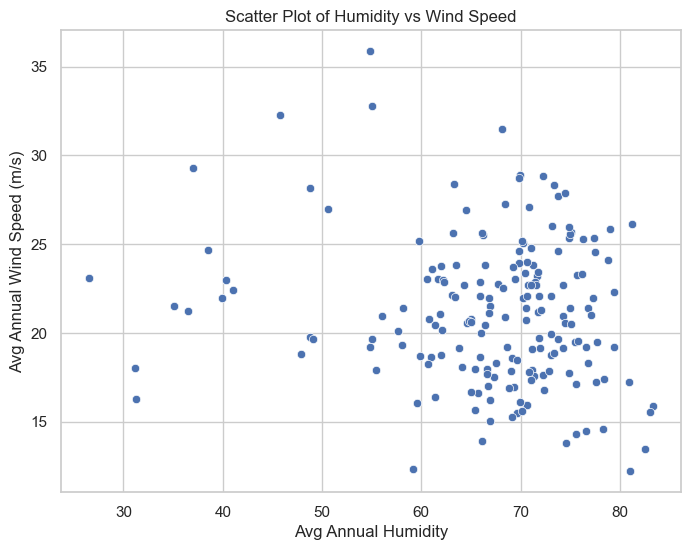

The correlation coefficient between Humidity and Wind Speed is: PearsonRResult(statistic=-0.14364645938499465, pvalue=0.005770012341790548)


In [232]:
# Calculating the correlation coefficient
correlation_coefficient = pearsonr(combined_df['Avg Annual Humidity'], combined_df['Avg Annual Wind Speed(M/S)'])

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Avg Annual Humidity', y='Avg Annual Wind Speed(M/S)')
plt.title('Scatter Plot of Humidity vs Wind Speed')
plt.xlabel('Avg Annual Humidity')
plt.ylabel('Avg Annual Wind Speed (m/s)')
plt.grid(True)
plt.show()

# Printing the correlation coefficient
print("The correlation coefficient between Humidity and Wind Speed is:", correlation_coefficient)

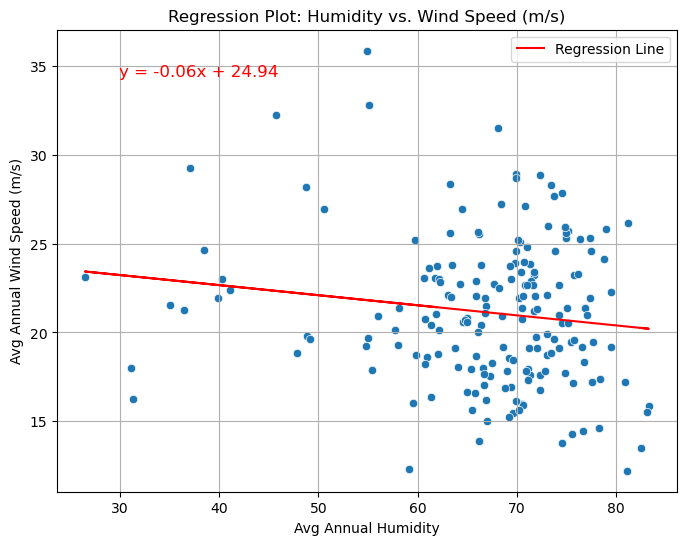

In [164]:
# Plotting the scatter plot for Humidity vs. Wind Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df,x='Avg Annual Humidity', y='Avg Annual Wind Speed(M/S)')

# Calculating the slope and intercept for the regression line
x_values = combined_df['Avg Annual Humidity']
y_values = combined_df['Avg Annual Wind Speed(M/S)']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line')

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding title and labels
plt.title('Regression Plot: Humidity vs. Wind Speed (m/s)')
plt.xlabel('Avg Annual Humidity')
plt.ylabel('Avg Annual Wind Speed (m/s)')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
# Add a constant term to the independent variable (humidity)
X = combined_df['Avg Annual Humidity']
y = combined_df['Avg Annual Wind Speed(M/S)']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()


# Print the summary of the regression model
print("\nRegression Results:")
print(model.summary())


Regression Results:
                                OLS Regression Results                                
Dep. Variable:     Avg Annual Wind Speed(M/S)   R-squared:                       0.021
Model:                                    OLS   Adj. R-squared:                  0.018
Method:                         Least Squares   F-statistic:                     7.711
Date:                        Tue, 16 Apr 2024   Prob (F-statistic):            0.00577
Time:                                14:49:58   Log-Likelihood:                -1035.2
No. Observations:                         368   AIC:                             2074.
Df Residuals:                             366   BIC:                             2082.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------

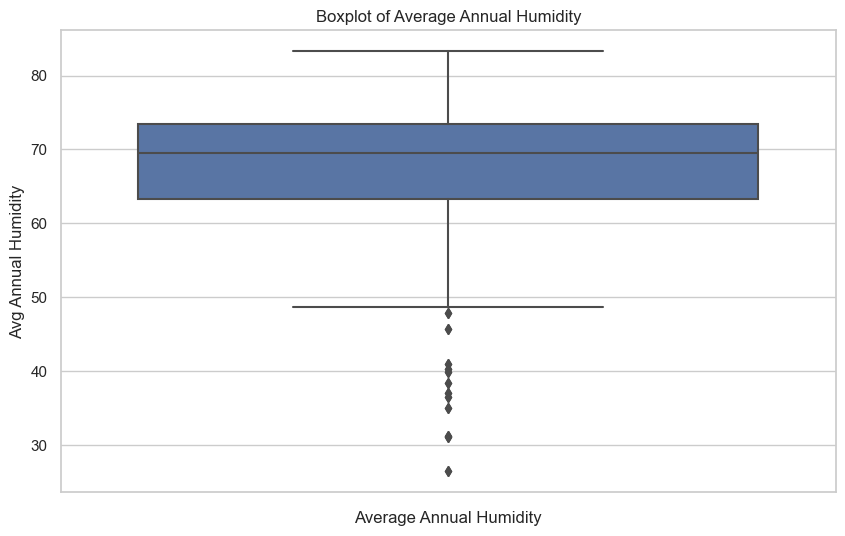

In [188]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Avg Annual Humidity', data=combined_df, orient='v')

# Set labels and title
plt.xlabel('Average Annual Humidity')
plt.title('Boxplot of Average Annual Humidity')

# Show the plot
plt.show()

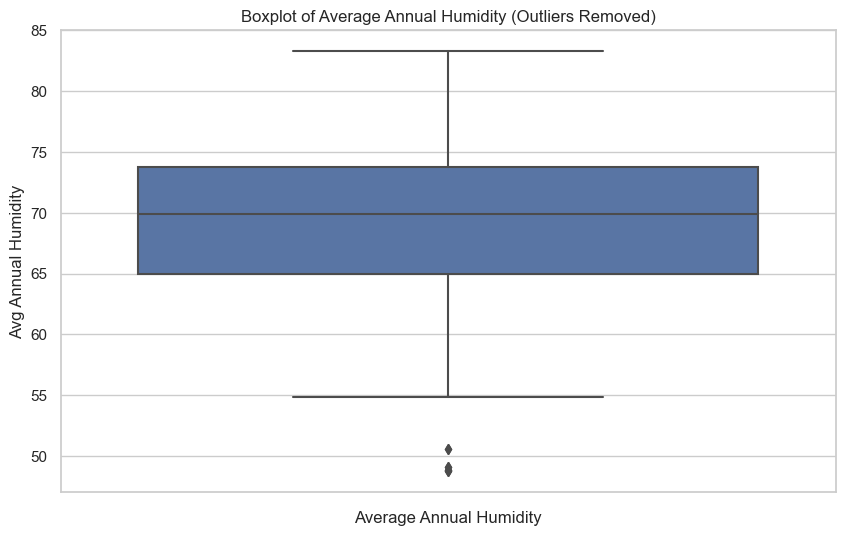

In [187]:
# Calculate Q1, Q3, and IQR
Q1 = combined_df['Avg Annual Humidity'].quantile(0.25)
Q3 = combined_df['Avg Annual Humidity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_df = combined_df[(combined_df['Avg Annual Humidity'] >= lower_bound) & (combined_df['Avg Annual Humidity'] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(y='Avg Annual Humidity', data=cleaned_df, orient='v')
plt.xlabel('Average Annual Humidity')
plt.title('Boxplot of Average Annual Humidity (Outliers Removed)')
plt.show()

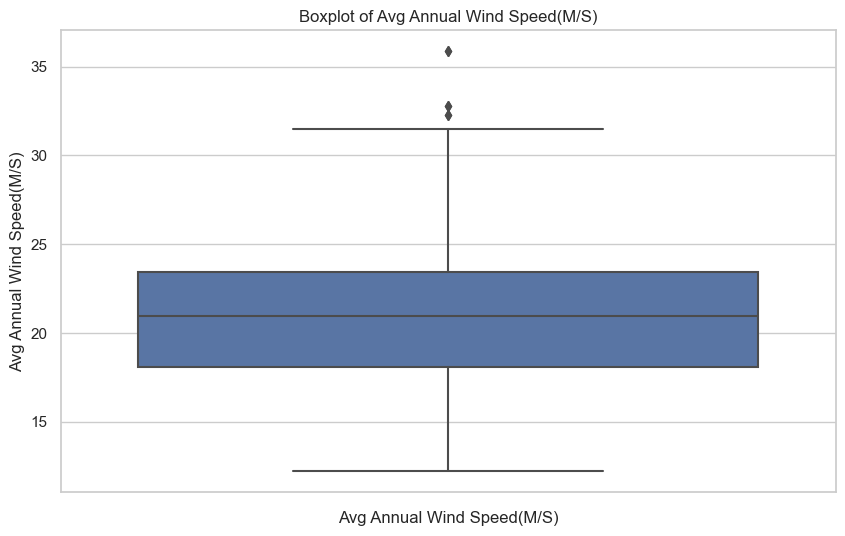

In [181]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y='Avg Annual Wind Speed(M/S)', data=combined_df, orient='v')

# Set labels and title
plt.xlabel('Avg Annual Wind Speed(M/S)')
plt.title('Boxplot of Avg Annual Wind Speed(M/S)')

# Show the plot
plt.show()

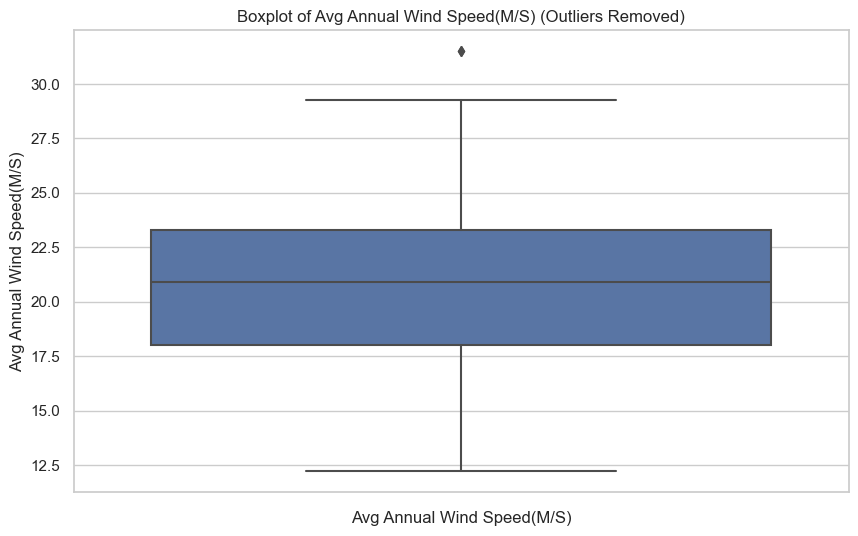

In [182]:
# Calculate Q1, Q3, and IQR
Q1 = combined_df['Avg Annual Wind Speed(M/S)'].quantile(0.25)
Q3 = combined_df['Avg Annual Wind Speed(M/S)'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_df = combined_df[(combined_df['Avg Annual Wind Speed(M/S)'] >= lower_bound) & (combined_df['Avg Annual Wind Speed(M/S)'] <= upper_bound)]

# Create a boxplot of the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(y='Avg Annual Wind Speed(M/S)', data=cleaned_df, orient='v')
plt.xlabel('Avg Annual Wind Speed(M/S)')
plt.title('Boxplot of Avg Annual Wind Speed(M/S) (Outliers Removed)')
plt.show()

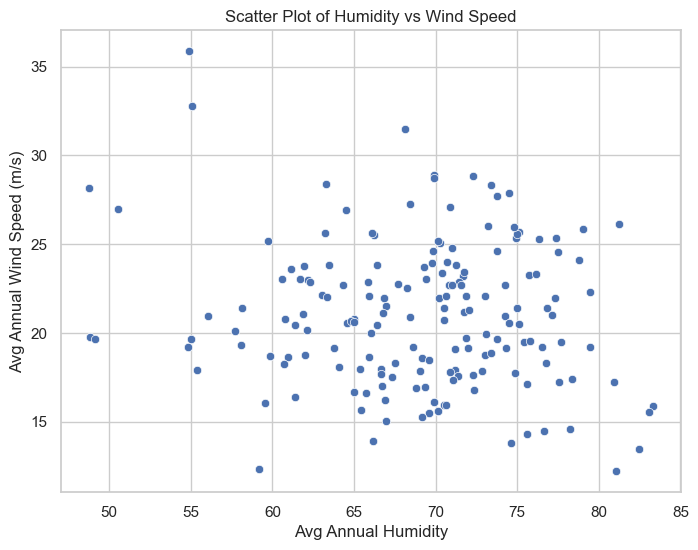

The correlation coefficient between Humidity and Wind Speed is: -0.13068161834224604


In [214]:
# Calculating the correlation coefficient
correlation_coefficient = pearsonr(cleaned_df['Avg Annual Humidity'], cleaned_df['Avg Annual Wind Speed(M/S)'])

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='Avg Annual Humidity', y='Avg Annual Wind Speed(M/S)')
plt.title('Scatter Plot of Humidity vs Wind Speed')
plt.xlabel('Avg Annual Humidity')
plt.ylabel('Avg Annual Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig1.png")

# Display the plot
plt.show()

# Printing the correlation coefficient
print("The correlation coefficient between Humidity and Wind Speed is:", correlation_coefficient)


### Summary
The correlation coefficient of -0.079 suggests that there is a very weak negative relationship between humidity and wind speed in the dataset. As humidity increases, wind speed tends to decrease slightly, and vice versa.

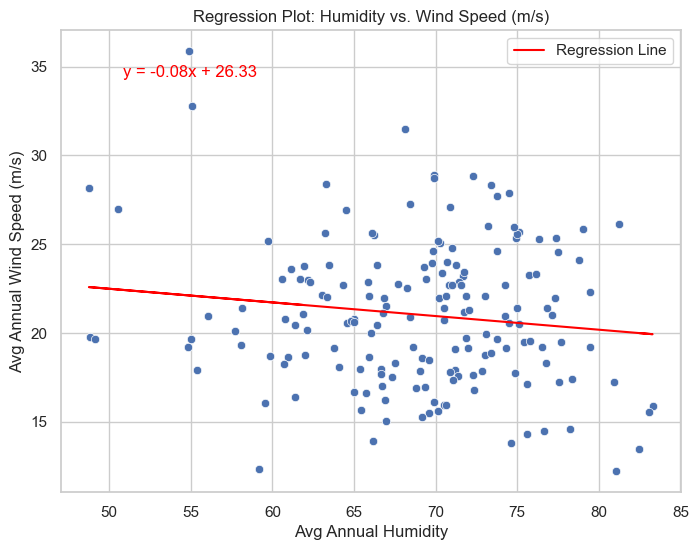

In [215]:
# Plotting the scatter plot for Humidity vs. Wind Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df,x='Avg Annual Humidity', y='Avg Annual Wind Speed(M/S)')

# Calculating the slope and intercept for the regression line
x_values = cleaned_df['Avg Annual Humidity']
y_values = cleaned_df['Avg Annual Wind Speed(M/S)']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line')

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding title and labels
plt.title('Regression Plot: Humidity vs. Wind Speed (m/s)')
plt.xlabel('Avg Annual Humidity')
plt.ylabel('Avg Annual Wind Speed (m/s)')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig2.png")

# Display the plot
plt.show()

In [185]:
# Add a constant term to the independent variable (humidity)
X = cleaned_df['Avg Annual Humidity']
y = cleaned_df['Avg Annual Wind Speed(M/S)']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()


# Print the summary of the regression model
print("\nRegression Results:")
print(model.summary())


Regression Results:
                                OLS Regression Results                                
Dep. Variable:     Avg Annual Wind Speed(M/S)   R-squared:                       0.006
Model:                                    OLS   Adj. R-squared:                  0.003
Method:                         Least Squares   F-statistic:                     2.264
Date:                        Tue, 16 Apr 2024   Prob (F-statistic):              0.133
Time:                                15:17:42   Log-Likelihood:                -992.70
No. Observations:                         362   AIC:                             1989.
Df Residuals:                             360   BIC:                             1997.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------


### Hypothesis:

Null Hypothesis (H0): 
- There is no significant linear relationship between humidity and wind speed.

Alternative Hypothesis (H1):
- Higher humidity leads to lower wind speed.

Based on the provided regression result:

Variables:

- Dependent Variable: Avg Annual Wind Speed(M/S)
- Independent Variable: Avg Annual Humidity

Based on the results:
- The regression analysis indicates a weak negative relationship between average annual humidity and wind speed. 
- The coefficient of -0.0292 suggests that for every one-unit increase in average annual humidity, there is a decrease of approximately 0.0292 units in average annual wind speed, holding other variables constant. 
- The R-squared value of 0.006 indicates that only approximately 0.6% of the variability in wind speed can be explained by the variability in humidity.
- p-value = 0.133, which is greater than the conventional significance level of 0.05.

Conclusions:

The regression analysis did not provide sufficient evidence to support the alternative hypothesis that higher humidity leads to lower wind speed. The relationship between humidity and wind speed appears to be weak and not statistically significant in this dataset. Therefore, based on this analysis, we fail to reject the null hypothesis, suggesting that there is no significant linear relationship between humidity and wind speed in this context.

In [193]:
# Merging population data and total pollution data based on the 'Cities' column
merged_pollution_population_data=pd.merge(population_data,total_pollution_data, on= 'Cities')
merged_pollution_population_data

,Country_x,Cities,2000_x,2001_x,2002_x,2003_x,2004_x,2005_x,2006_x,2007_x,...,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y,2018_y,2019_y,2020_y
0,Canada,Toronto,"4,607,000","4,694,000","4,777,000","4,861,000","4,948,000","5,035,000","5,125,000","5,216,000",...,8.2,8.5,8.0,8.3,7.8,7.1,7.5,7.6,7.0,7.2
1,United States,New York,"17,813,000","17,868,000","17,922,000","17,977,000","18,032,000","18,087,000","18,142,000","18,198,000",...,10.1,9.2,9.3,8.8,8.2,8.1,7.7,7.7,7.4,8.0
2,Colombia,Bogota,"6,329,000","6,512,000","6,701,000","6,894,000","7,094,000","7,299,000","7,510,000","7,727,000",...,21.8,19.0,19.9,19.4,18.7,18.2,18.6,16.7,15.0,14.9
3,Chile,Santiago,"5,658,000","5,777,000","5,884,000","5,930,000","5,978,000","6,025,000","6,073,000","6,122,000",...,26.6,25.9,28.2,27.0,28.4,28.9,27.6,27.2,26.4,27.0
4,Mexico,Mexico City,"18,457,000","18,618,000","18,780,000","18,944,000","19,110,000","19,276,000","19,444,000","19,614,000",...,27.9,25.2,25.9,24.2,23.8,23.4,22.5,20.6,18.2,17.8


In [197]:
# Creating a DataFrame with population and pollution data for multiple cities over the years
selected_df = {
    "Year": [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    "Toronto_population": [4607000, 4694000, 4777000, 4861000, 4948000, 5035000, 5125000, 5216000, 5309000, 5403000, 5499000, 5593000, 5660000, 5728000, 5797000, 5867000, 5938000, 6010000, 6082000, 6139000, 6197000],
    "New York_population": [17813000, 17868000, 17922000, 17977000, 18032000, 18087000, 18142000, 18198000, 18254000, 18309000, 18365000, 18421000, 18478000, 18534000, 18591000, 18648000, 18705000, 18762000, 18819000, 18805000, 18804000],
    "Bogota_population": [6329000, 6512000, 6701000, 6894000, 7094000, 7299000, 7510000, 7727000, 7951000, 8181000, 8418000, 8661000, 8912000, 9170000, 9435000, 9708000, 9989000, 10278000, 10574000, 10779000, 10978000],
    "Santiago_population": [5658000, 5777000, 5884000, 5930000, 5978000, 6025000, 6073000, 6122000, 6171000, 6220000, 6269000, 6319000, 6370000, 6420000, 6472000, 6523000, 6575000, 6628000, 6680000, 6724000, 6767000],
    "Mexico City_population": [18457000, 18618000, 18780000, 18944000, 19110000, 19276000, 19444000, 19614000, 19785000, 19958000, 20137000, 20372000, 20610000, 20850000, 21094000, 21340000, 21420000, 21500000, 21581000, 21672000, 21782000],
    "Toronto_pollution": [11.0, 11.7, 11.4, 10.9, 10.0, 11.4, 10.4, 9.8, 9.7, 8.3, 8.2, 8.2, 8.5, 8.0, 8.3, 7.8, 7.1, 7.5, 7.6, 7.0, 7.2],
    "New York_pollution": [13.8, 13.0, 12.6, 12.8, 11.8, 12.4, 11.6, 12.1, 10.7, 9.7, 9.5, 10.1, 9.2, 9.3, 8.8, 8.2, 8.1, 7.7, 7.7, 7.4, 8.0],
    "Bogota_pollution": [25.6, 22.9, 23.3, 23.1, 21.9, 21.0, 22.8, 22.2, 20.3, 19.1, 19.9, 21.8, 19.0, 19.9, 19.4, 18.7, 18.2, 18.6, 16.7, 15.0, 14.9],
    "Santiago_pollution": [33.5, 33.7, 32.8, 33.0, 31.3, 31.1, 31.5, 31.0, 29.7, 28.1, 26.1, 26.6, 25.9, 28.2, 27.0, 28.4, 28.9, 27.6, 27.2, 26.4, 27.0],
    "Mexico City_pollution": [43.2, 30.6, 31.3, 33.2, 28.4, 29.0, 30.1, 29.2, 26.7, 25.5, 24.9, 27.9, 25.2, 25.9, 24.2, 23.8, 23.4, 22.5, 20.6, 18.2, 17.8]
}

# Create a DataFrame with selected data
pollution_population_df = pd.DataFrame(selected_df)
pollution_population_df

,Year,Toronto_population,New York_population,Bogota_population,Santiago_population,Mexico City_population,Toronto_pollution,New York_pollution,Bogota_pollution,Santiago_pollution,Mexico City_pollution
0,2000,4607000,17813000,6329000,5658000,18457000,11.0,13.8,25.6,33.5,43.2
1,2001,4694000,17868000,6512000,5777000,18618000,11.7,13.0,22.9,33.7,30.6
2,2002,4777000,17922000,6701000,5884000,18780000,11.4,12.6,23.3,32.8,31.3
3,2003,4861000,17977000,6894000,5930000,18944000,10.9,12.8,23.1,33.0,33.2
4,2004,4948000,18032000,7094000,5978000,19110000,10.0,11.8,21.9,31.3,28.4
5,2005,5035000,18087000,7299000,6025000,19276000,11.4,12.4,21.0,31.1,29.0
6,2006,5125000,18142000,7510000,6073000,19444000,10.4,11.6,22.8,31.5,30.1
7,2007,5216000,18198000,7727000,6122000,19614000,9.8,12.1,22.2,31.0,29.2
8,2008,5309000,18254000,7951000,6171000,19785000,9.7,10.7,20.3,29.7,26.7
9,2009,5403000,18309000,8181000,6220000,19958000,8.3,9.7,19.1,28.1,25.5


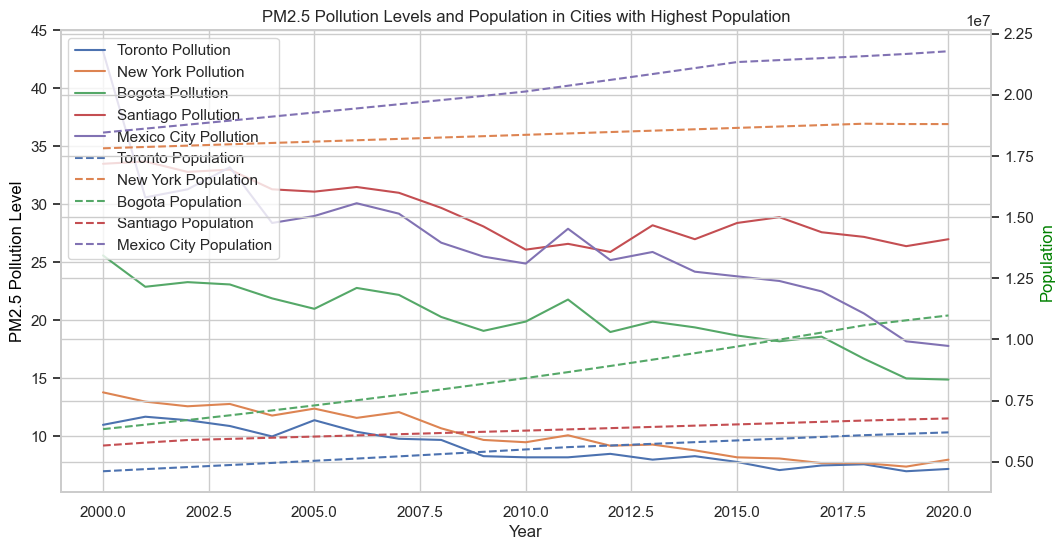

In [218]:
# List of cities with the highest population and pollution
cities = ['Toronto', 'New York', 'Bogota', 'Santiago', 'Mexico City']

# Plot pollution for each city
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a secondary y-axis to plot population
ax2 = ax1.twinx()

# Iterate over each city to plot pollution and population data
for city in cities:

    # Plot pollution data for the current city on the primary y-axis (ax1)
    ax1.plot(pollution_population_df['Year'], pollution_population_df[f'{city}_pollution'], label=f'{city} Pollution', linestyle='-')
    
    # Plot population data for the current city on the secondary y-axis (ax2)
    ax2.plot(pollution_population_df['Year'], pollution_population_df[f'{city}_population'], label=f'{city} Population', linestyle='--')

# Set labels for x-axis and y-axes
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5 Pollution Level', color='black')
ax2.set_ylabel('Population', color='green')

# Set title for the plot
ax1.set_title('PM2.5 Pollution Levels and Population in Cities with Highest Population')

# Combine legends from both axes into a single legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Save the figure
plt.savefig("Resources/Fig3.png")

# Display the plot
plt.show()

### Trend analysis findings:

- Population Growth: 
    - Overall, there is a general upward trend in population for all cities over the years. The population of each city seems to be increasing steadily, with varying rates of growth.

- Pollution Levels: 
    - The pollution levels, as indicated by PM2.5 pollution, show fluctuations over the years. While some cities exhibit a decreasing trend in pollution levels, others show a more erratic pattern with both increases and decreases.

Overall, further investigation is required to evaluate if there is a significant relation between population growth and pollution trends in each city.

In [245]:
# Specify the column names for population and pollution
population_column = 'Toronto_population'
pollution_column = 'Toronto_pollution'

# Check if the specified columns exist in the DataFrame
if population_column in pollution_population_df.columns and pollution_column in pollution_population_df.columns:
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[[population_column]]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:      Toronto_pollution   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     192.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.14e-11
Time:                        13:46:24   Log-Likelihood:                -13.694
No. Observations:                  21   AIC:                             31.39
Df Residuals:                      19   BIC:                             33.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const          

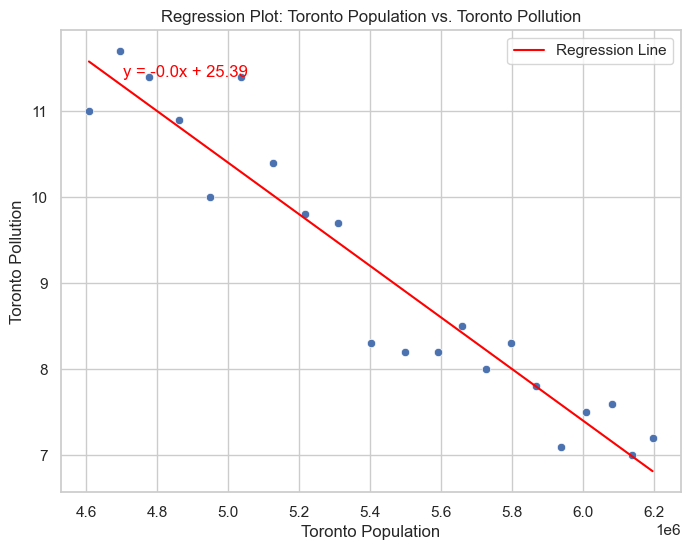

In [244]:
# Plotting the scatter plot for Toronto population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Toronto_population', y='Toronto_pollution', data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Toronto_population']
y_values = pollution_population_df['Toronto_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line')

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding title and labels
plt.xlabel('Toronto Population')
plt.ylabel('Toronto Pollution')
plt.title('Regression Plot: Toronto Population vs. Toronto Pollution')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig4.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Toronto and the pollution levels in Toronto.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Toronto and the pollution levels in Toronto.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.910, which means that approximately 91.0% of the variance in Toronto_pollution is explained by the Toronto_population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Toronto and the pollution levels in Toronto.

In [243]:
# Specify the column names for population and pollution
population_column = 'New York_population'
pollution_column = 'New York_pollution'

# Check if the specified columns exist in the DataFrame
if population_column in pollution_population_df.columns and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[[population_column]]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

   # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:     New York_pollution   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     475.2
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           6.61e-15
Time:                        13:46:16   Log-Likelihood:                -10.219
No. Observations:                  21   AIC:                             24.44
Df Residuals:                      19   BIC:                             26.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const        

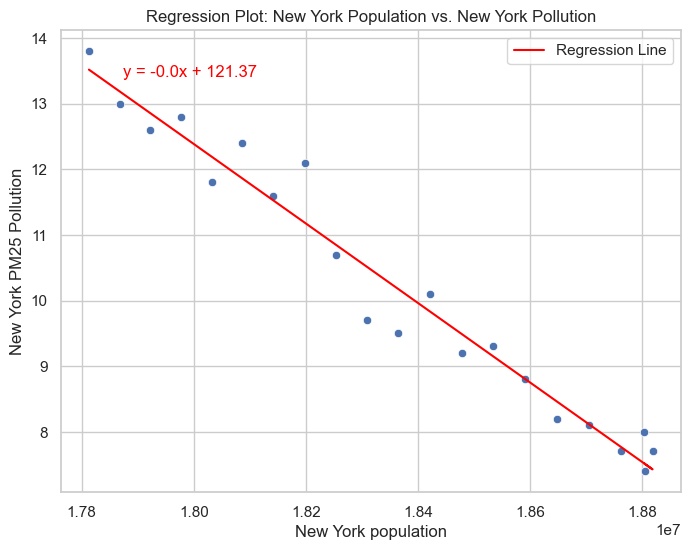

In [242]:
# Plotting the scatter plot for New York population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='New York_population', y='New York_pollution', data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['New York_population']
y_values = pollution_population_df['New York_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line')

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding title and labels
plt.xlabel('New York population')
plt.ylabel('New York PM25 Pollution')
plt.title('Regression Plot: New York Population vs. New York Pollution')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig5.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of New York and the pollution levels in New York.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of New York  and the pollution levels in New York.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.962, which means that approximately 96.2% of the variance in New York pollution is explained by the New York population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of New York and the pollution levels in New York.

In [241]:
# Specify the column names for population and pollution
population_column = 'Bogota_population'
pollution_column = 'Bogota_pollution'

# Check if the specified columns exist in the DataFrame
if population_column in pollution_population_df.columns and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[[population_column]]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:       Bogota_pollution   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     118.3
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           1.33e-09
Time:                        13:46:09   Log-Likelihood:                -29.741
No. Observations:                  21   AIC:                             63.48
Df Residuals:                      19   BIC:                             65.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const            

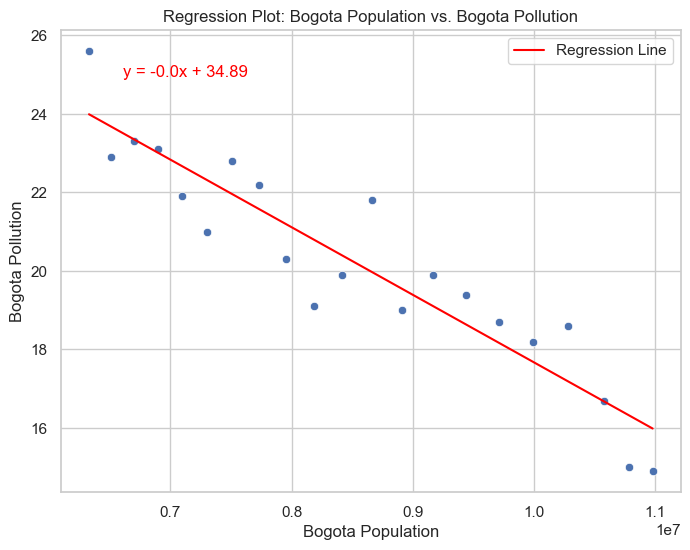

In [240]:
# Plotting the scatter plot for Bogota population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bogota_population', y='Bogota_pollution', data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Bogota_population']
y_values = pollution_population_df['Bogota_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line')

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding title and labels
plt.xlabel('Bogota Population')
plt.ylabel('Bogota Pollution')
plt.title('Regression Plot: Bogota Population vs. Bogota Pollution')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig6.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Bogota and the pollution levels in Bogota.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Bogota and the pollution levels in Bogota.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.862, which means that approximately 86.2% of the variance in Bogota pollution is explained by the Bogota population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Bogota and the pollution levels in Bogota.

In [239]:
# Specify the column names for population and pollution
population_columns = ['Santiago_population']
pollution_column = 'Santiago_pollution'  

# Check if the specified columns exist in the DataFram
if all(col in pollution_population_df.columns for col in population_columns) and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[population_columns]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                            OLS Regression Results                            
Dep. Variable:     Santiago_pollution   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     50.92
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           8.76e-07
Time:                        13:46:00   Log-Likelihood:                -35.814
No. Observations:                  21   AIC:                             75.63
Df Residuals:                      19   BIC:                             77.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const        

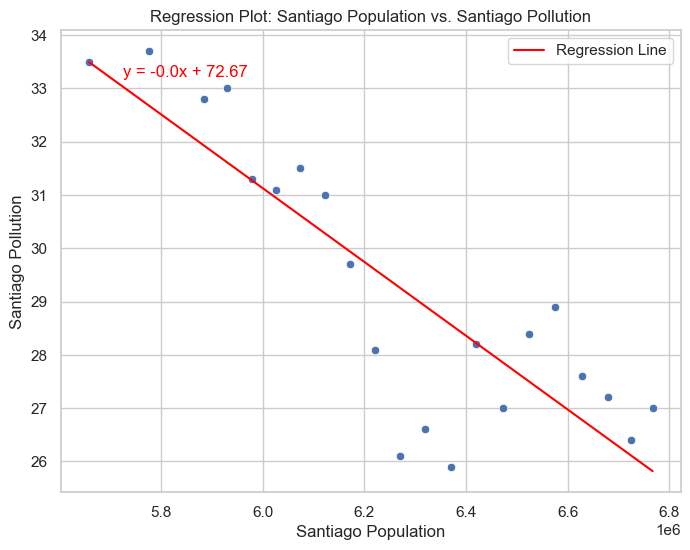

In [238]:
# Plotting the scatter plot for Santiago populationy vs. Santiago pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Santiago_population', y='Santiago_pollution', data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Santiago_population']
y_values = pollution_population_df['Santiago_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line')

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding title and labels
plt.xlabel('Santiago Population')
plt.ylabel('Santiago Pollution')
plt.title('Regression Plot: Santiago Population vs. Santiago Pollution')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig7.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Santiago and the pollution levels in Santiago.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Santiago and the pollution levels in Santiago.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.728, which means that approximately 72.8% of the variance in Santiago pollution is explained by the Santiago population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Santiago and the pollution levels in Santiago.

In [237]:
# Specify the column names for population and pollution
population_columns = ['Mexico City_population']
pollution_column = 'Mexico City_pollution'  

# Check if the specified columns exist in the DataFram
if all(col in pollution_population_df.columns for col in population_columns) and pollution_column in pollution_population_df.columns:
    
    # Extract the independent variable (population) and add a constant term
    X = pollution_population_df[population_columns]
    X = sm.add_constant(X)  # Add a constant term

    # Extract the dependent variable (pollution)
    y = pollution_population_df[pollution_column]

    # Fit an Ordinary Least Squares (OLS) regression model
    model = sm.OLS(y, X)
    results = model.fit()

    # Print the regression results summary
    print("\nRegression Results:")
    print(results.summary())
else:
    # Print a message if one or more specified column names do not exist in the DataFrame
    print("One or more specified column names do not exist in the DataFrame.")


Regression Results:
                              OLS Regression Results                             
Dep. Variable:     Mexico City_pollution   R-squared:                       0.764
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     61.66
Date:                   Wed, 17 Apr 2024   Prob (F-statistic):           2.21e-07
Time:                           13:45:51   Log-Likelihood:                -50.122
No. Observations:                     21   AIC:                             104.2
Df Residuals:                         19   BIC:                             106.3
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

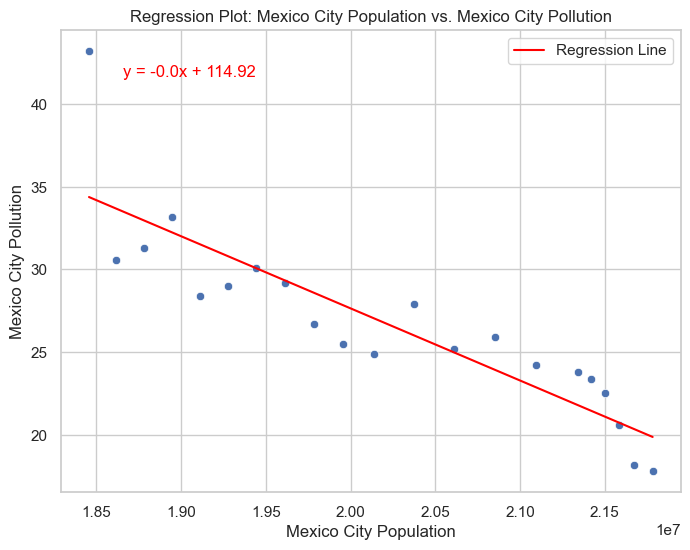

In [236]:
# Plotting the scatter plot for Mexico City population vs. pollution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mexico City_population', y='Mexico City_pollution', data=pollution_population_df)

# Calculating the slope and intercept for the regression line
x_values = pollution_population_df['Mexico City_population']
y_values = pollution_population_df['Mexico City_pollution']
slope, intercept = np.polyfit(x_values, y_values, 1)

# Plotting the regression line
plt.plot(x_values, slope*x_values + intercept, color='red', label='Regression Line')

# Annotating the equation of the regression line on the plot
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=12, color='red')

# Adding title and labels
plt.xlabel('Mexico City Population')
plt.ylabel('Mexico City Pollution')
plt.title('Regression Plot: Mexico City Population vs. Mexico City Pollution')
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig8.png")

# Display the plot
plt.show()

Hypothesis:

- Null Hypothesis (H0): 
    - There is no significant linear relationship between the population of Mexico City and the pollution levels in Mexico City.

- Alternative Hypothesis (H1): 
    - There is a significant linear relationship between the population of Mexico City and the pollution levels in Mexico City.

Based on the regression results provided: 
- R-squared: R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In this case, the R-squared value is 0.764, which means that approximately 76.4% of the variance in Mexico City pollution is explained by the Mexico City population.
- The p-value is 0.001, which is less than the typical significance level of 0.05. 

Therefore, we reject the null hypothesis and conclude that there is a significant linear relationship between the population of Mexico City and the pollution levels in Mexico City.